In [256]:
source("/secure/projects/HTAPP_MBC/src/init.R")
library(CountClust)
library(enrichR)

Loading combined annotation: annot
Warning message in fread(combined_annot_file):
"Found and resolved improper quoting in first 100 rows. If the fields are not quoted (e.g. field separator does not appear within any field), try quote="" to avoid this warning."

In [2]:
wd=file.path(analysisDir,"03_topics")
dir.create(wd)
setwd(wd)

Warning message in dir.create(wd):
"'/scratch/projects/HTAPP_MBC//analysis//03_topics' already exists"

In [3]:
simpleCache(cacheName = "fresh_combined",
            instruction = "", 
            cacheDir = cacheDir, 
            cacheSubDir = "combined_seurat", 
            recreate = FALSE,assignToVariable = "cs")

Character instruction; consider wrapping in braces.
::Loading cache::	/scratch/projects/HTAPP_MBC//RCache//combined_seurat/fresh_combined.RData


In [4]:
cs=FindClusters(object = cs, reduction.type = "pca", dims.use = 1:10, resolution = 0.6, print.output = 0)

In [260]:
#discriminate between b-cells and plasma cells
lab_dt=as.data.table(cs@meta.data[,c("labels","labels_detail")],keep.rownames = "cellid")
lab_dt[,labels_mod:=ifelse(labels=="B_cell"&labels_detail=="B_cell:Plasma_cell","Plasma_cell",labels),]
lab_dt[,labels_mod:=ifelse(labels%in%c("iPS_cells"),"Epithelial_stem",labels_mod),]  #this renameing was done after calculating all the models for plotting the expression (should be ok)
setnames(lab_dt,c("labels","labels_mod"),c("labels_orig","labels"))
lab_df=data.frame(lab_dt,row.names = "cellid")
cs=AddMetaData(cs,metadata = lab_df)

cs=SetIdent(cs,ident.use = cs@meta.data$labels)

In [261]:
md=as.data.table(cs@meta.data,keep.rownames = "cellid")

#### overview

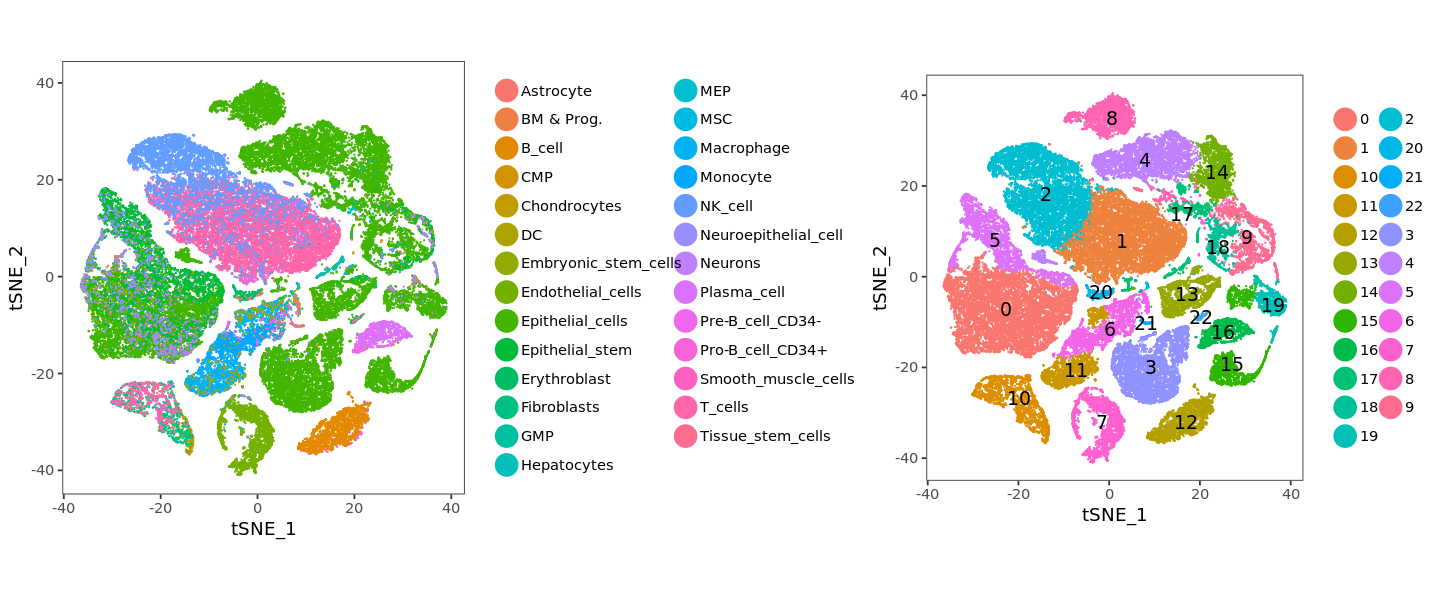

In [262]:
options(repr.plot.width = 12, repr.plot.height = 5)
p1=TSNEPlot(SubsetData(cs,subset.name = "N_labels",accept.low = 10),coord.fixed=TRUE,do.label=FALSE,group.by="labels",pt.size = 0.01,do.return=TRUE)
p2=TSNEPlot(cs,do.label=TRUE,group.by="res.0.6",coord.fixed=TRUE,pt.size = 0.01,do.return=TRUE)
plot_grid(p1,p2,rel_widths = c(3,2),ncol=2)

### Setup

In [267]:
cell_types=c("Epithelial_cells","Epithelial_stem")
tag="malignant"
test_range=4:10
true_range=c(10,11,12,13,14,16)
k=13
tol=0.01
nc=4000
set.seed=1234
cells=sample(md[labels%in%cell_types]$cellid,nc,replace = FALSE)

In [190]:
cell_types=c("T_cells")
tag="T_cells"
test_range=2:6
true_range=c(2,3)
k=3
tol=0.01
nc=4000
cells=md[labels%in%cell_types&res.0.6%in%c(1,2)]$cellid

In [196]:
cell_types=c("NK_cell")
tag="NK_cell"
test_range=2:6
true_range=c(2,3)
k=3
tol=0.01
nc=4000
cells=md[labels%in%cell_types&res.0.6%in%c(1,2)]$cellid

In [201]:
cell_types=c("Fibroblasts","Tissue_stem_cells","Chondrocytes")
tag="Fibroblasts"
test_range=2:6
true_range=c(4,5,6,7)
k=4
tol=0.01
nc=Inf
cells=md[labels%in%cell_types&res.0.6==10]$cellid

In [206]:
cell_types=c("Endothelial_cells")
tag="Endothelial"
test_range=2:6
true_range=c(2,3,4,5,6,7)
k=5
tol=0.01
nc=Inf
cells=md[labels%in%cell_types&res.0.6==7]$cellid

In [248]:
cell_types=c("Monocyte","Macrophage","DC")
tag="MonoMacro"
test_range=2:8
true_range=c(4,5,6,7,8,9,10,11,12)
k=7
tol=0.01
nc=Inf
cells=md[labels%in%cell_types&res.0.6%in%c(11,6)]$cellid

In [227]:
cell_types=c("B_cell")
tag="B_cell"
test_range=2:6
true_range=c(2,3)
k=3
tol=0.01
nc=Inf
cells=md[labels%in%cell_types&res.0.6%in%c(12)]$cellid

In [240]:
cell_types=c("Plasma_cell")
tag="Plasma_cell"
test_range=2:12
true_range=c(6,8,10,12,14,16)
k=10
tol=0.01
nc=Inf
cells=md[labels%in%cell_types&res.0.6%in%c(16)]$cellid

#### exclude genes from analysis

In [7]:
ribo_genes=fread(file.path(extDir,"ribo_prots.txt"))

In [8]:
rm_genes=c(grep("^MT-",row.names(cs@raw.data),value = TRUE),ribo_genes$`Approved symbol`)
length(rm_genes)
cat(sort(rm_genes))

[1] 176

DAP3 FAU MRPL1 MRPL10 MRPL11 MRPL12 MRPL13 MRPL14 MRPL15 MRPL16 MRPL17 MRPL18 MRPL19 MRPL2 MRPL20 MRPL21 MRPL22 MRPL23 MRPL24 MRPL27 MRPL28 MRPL3 MRPL30 MRPL32 MRPL33 MRPL34 MRPL35 MRPL36 MRPL37 MRPL38 MRPL39 MRPL4 MRPL40 MRPL41 MRPL42 MRPL43 MRPL44 MRPL45 MRPL46 MRPL47 MRPL48 MRPL49 MRPL50 MRPL51 MRPL52 MRPL53 MRPL54 MRPL55 MRPL57 MRPL9 MRPS10 MRPS11 MRPS12 MRPS14 MRPS15 MRPS16 MRPS17 MRPS18A MRPS18B MRPS18C MRPS2 MRPS21 MRPS22 MRPS23 MRPS24 MRPS25 MRPS26 MRPS27 MRPS28 MRPS30 MRPS31 MRPS33 MRPS34 MRPS35 MRPS36 MRPS5 MRPS6 MRPS7 MRPS9 MT-ATP6 MT-ATP8 MT-CO1 MT-CO2 MT-CO3 MT-CYB MT-ND1 MT-ND2 MT-ND3 MT-ND4 MT-ND4L MT-ND5 MT-ND6 RPL10 RPL10A RPL10L RPL11 RPL12 RPL13A RPL14 RPL15 RPL17 RPL18A RPL19 RPL21 RPL22 RPL23 RPL23A RPL24 RPL26 RPL26L1 RPL27 RPL27A RPL28 RPL29 RPL3 RPL30 RPL31 RPL32 RPL34 RPL35 RPL35A RPL36 RPL36A RPL36AL RPL37 RPL37A RPL38 RPL39 RPL39L RPL3L RPL4 RPL41 RPL5 RPL6 RPL7 RPL7A RPL7L1 RPL8 RPL9 RPLP0 RPLP1 RPLP2 RPS10 RPS11 RPS12 RPS13 RPS14 RPS15 RPS15A RPS16 RPS17 RP

### Analysis on smaller subsets to find k

In [ ]:
#specify analysis in setup
#run for 500 or 1000 cells per cell type
nc_test=1000
#nc_test=500
test_sub=SubsetData(cs,cells=cells,subset.name = "labels",accept.value = cell_types,max.cells.per.ident = nc_test,subset.raw = TRUE)
all_bic=data.table()
for (test_k in test_range){
    suppressMessages(expr = g<-FitGoM(data = t(as.matrix(test_sub@raw.data[!row.names(test_sub@raw.data)%in%rm_genes,])),K = test_k,tol = tol,options = "BIC"))
    bic=data.table(k=test_k,bic=g$BIC,tag=tag)
    all_bic=rbindlist(list(all_bic,bic))
    print(paste0(test_k,": ",bic$bic))
}
write.table(all_bic,paste0("k_",tag,"_",nc_test,".tsv"),sep="\t",quote=FALSE,row.names=FALSE)

In [11]:
#gather data
#nc_test=1000
nc_test=500
k_files=list.files(".",pattern = paste0("k_.*",nc_test,".tsv"))
all_bic=data.table()
for (k_file in k_files){
    f=fread(k_file)
    all_bic=rbindlist(list(all_bic,f))
}

##### plot

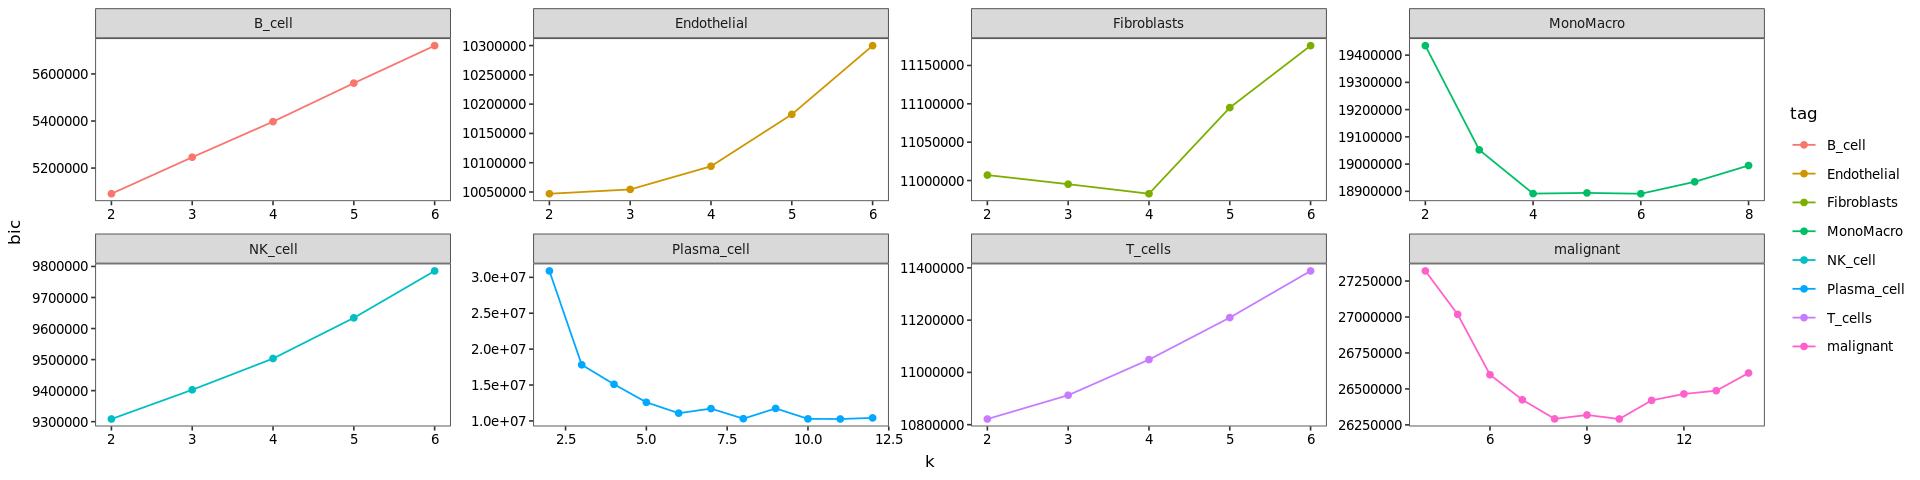

In [10]:
#1000 cells per cell type
options(repr.plot.width = 16, repr.plot.height = 4)
ggplot(all_bic,aes(x=k,y=bic,col=tag))+geom_line()+geom_point()+facet_wrap(~tag,ncol=4,scales="free")

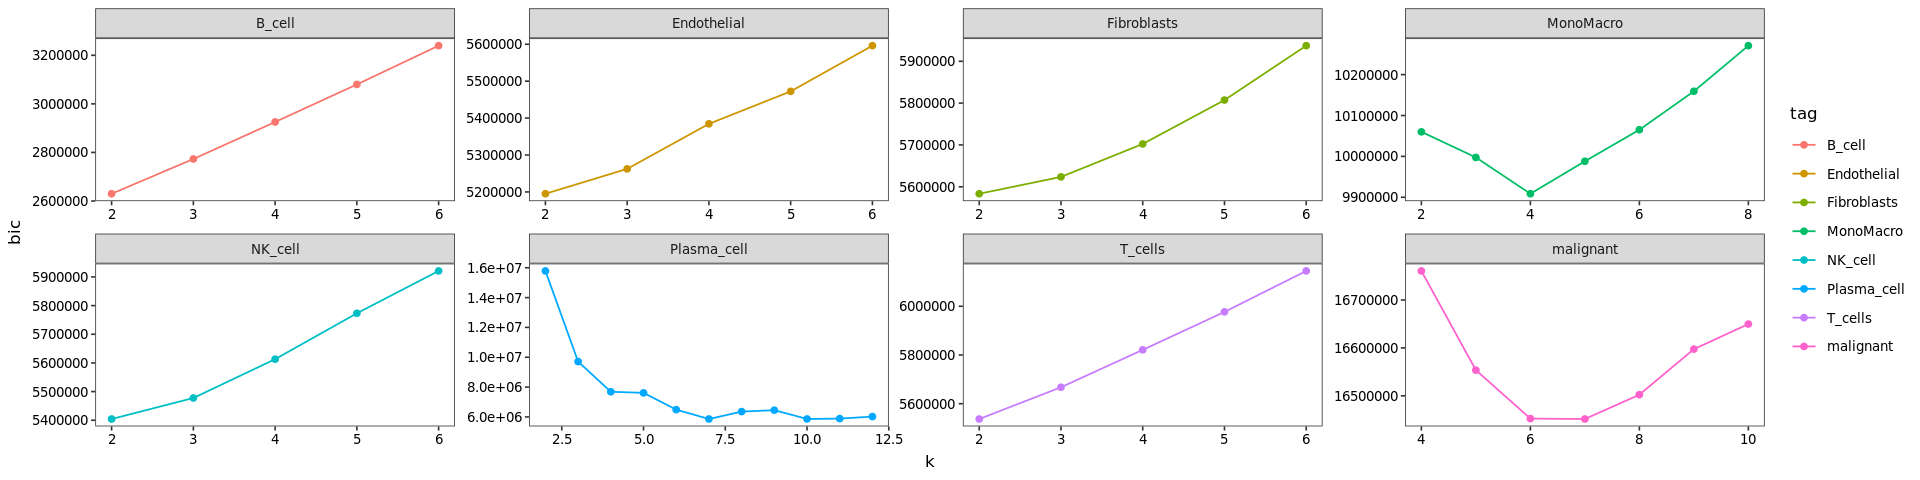

In [13]:
#500 cells per cell type
options(repr.plot.width = 16, repr.plot.height = 4)
ggplot(all_bic,aes(x=k,y=bic,col=tag))+geom_line()+geom_point()+facet_wrap(~tag,ncol=4,scales="free")

### Actual analysis

In [ ]:
#specify analysis in setup
sub=SubsetData(cs,cells=cells,subset.name = "labels",accept.value = cell_types,max.cells.per.ident = nc,subset.raw = TRUE,random.seed = 1234) 
for (sel_k in true_range){
simpleCache(cacheName = paste0("gom_multiK_",tag,"_",sel_k),instruction = FitGoM(data = t(as.matrix(sub@raw.data[!row.names(sub@raw.data)%in%rm_genes,])),K = sel_k,tol = tol),
            cacheDir = wd,assignToVariable = "gom",recreate = FALSE)
    print(gom$BIC)
}

#### gather data from runs with different k

In [96]:
goms=list.files(".",pattern = "gom_multiK")
final_bics=data.table()
for (sel_gom in goms){
    name=gsub(".RData|gom_multiK_","",sel_gom)
    ct=sub("_.*","",name)
    k_sel=sub(".*_","",name)
    load(sel_gom)
    bic=data.table(tag=ct,bic=ret$BIC,k=as.integer(k_sel))
    final_bics=rbindlist(list(final_bics,bic)) 
}

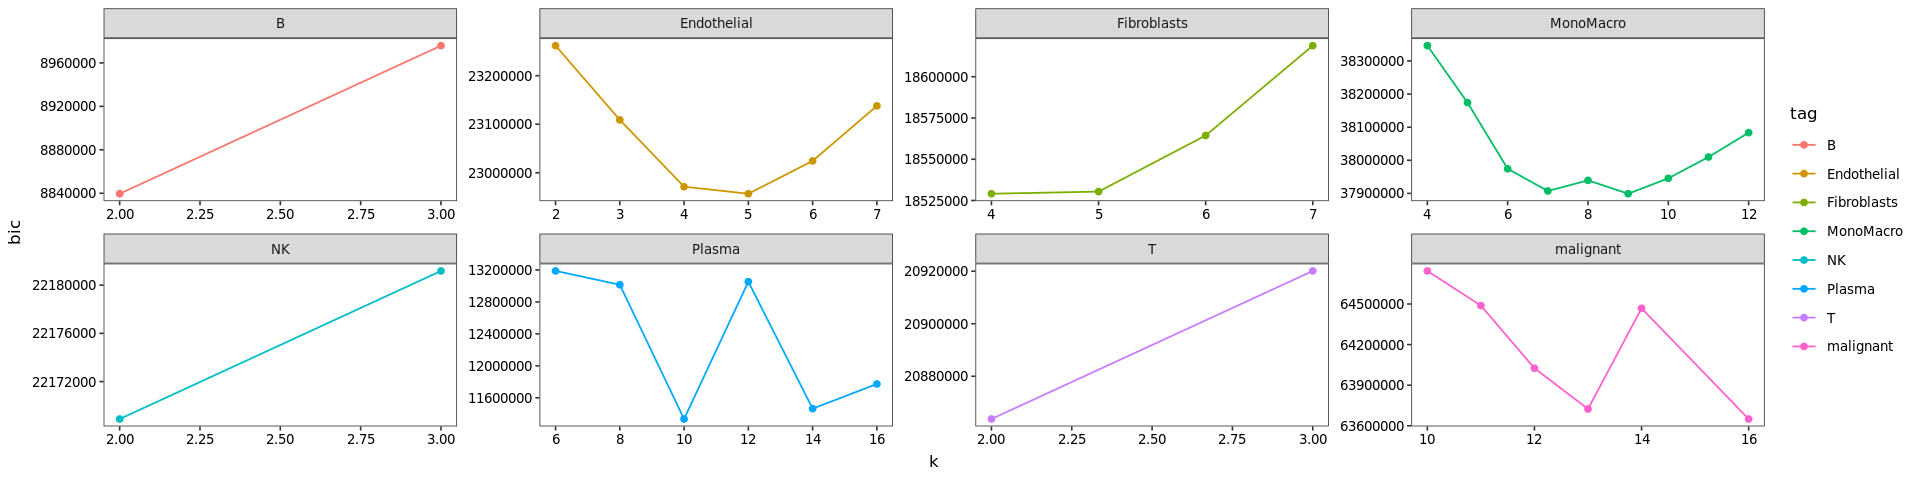

In [97]:
options(repr.plot.width = 16, repr.plot.height = 4)
ggplot(final_bics,aes(x=k,y=bic,col=tag))+geom_line()+geom_point()+facet_wrap(~tag,ncol=4,scales="free")

#### Follow-up

In [165]:
extract_genes=function(gom,sub){
print(paste(tag,present_data,present_gom,sep = " "))
#annotate and plot TSNE with topic scores
omega=as.data.frame(gom$fit$omega)
colnames(omega)=paste0("Topic_",colnames(omega))
sub=AddMetaData(sub,omega)
options(repr.plot.width = 16, repr.plot.height = 4)
TSNEPlot(sub,group.by="labels_detail",pt.size = 0.1,coord.fixed=TRUE)
FeaturePlot(sub,features.plot = colnames(omega),nCol = 7,cols.use = c("blue","red"),pt.size = 0.5,coord.fixed=TRUE)
#get top genes and write to table
top=30
theta=gom$fit$theta
features <- ExtractTopFeatures(theta,method = "bernoulli", top_features=top, options = 'min', shared=TRUE)
suppressWarnings(indices_long<-melt(as.data.table(t(features$indices))))
theta_red=as.data.table(theta[indices_long$value,],keep.rownames = "gene")
theta_red[,topic:=as.numeric(gsub("V","",indices_long$variable)),]
theta_red[,weight:=.SD[,topic,with=FALSE],by=c("gene","topic")] 
write.table(theta_red,paste0(tag,"_top.tsv"),sep="\t",quote=F,row.names=FALSE)

    
#run enrichr
invisible(capture.output(enrichr_res<-theta_red[weight>0.00,as.data.table(enrichr(genes = gene,databases = "GO_Biological_Process_2018")),by=topic]))
setnames(enrichr_res,names(enrichr_res),sub("GO_Biological_Process_2018\\.","",names(enrichr_res)))
enrichr_res=enrichr_res[order(topic,Adjusted.P.value)]
write.table(enrichr_res[Adjusted.P.value<0.05] ,paste0(tag,"_enrichr.tsv"),sep="\t",quote=F,row.names=FALSE)
#filter enrichr results
enrichr_res_filt=enrichr_res[,.SD[1],by=topic]  
    
genes=enrichr_res_filt[,.(gene=unlist(strsplit(Genes,";"))),by=c("topic","Term","Overlap","Adjusted.P.value")]
genes=merge(genes,theta_red[,c("gene","topic","weight"),],by=c("gene","topic"))
genes=genes[order(topic,-weight)]
genes[,go:=unlist(strsplit(Term,"\\(|\\)"))[2],by=1:nrow(genes)]
return(list(genes,enrichr_res_filt[,c("topic","Term","Overlap","Adjusted.P.value","Genes"),]))
}

In [179]:
prep_genes=function(genes,sel_topics){
    sel_genes=genes[[1]][topic%in%sel_topics]
    sel_genes[,type:=paste0(tag,"_t",topic,"_",go),]
    sel_genes[,assay:="topics_fresh",]
    sel_genes[,priority:=0,]
    sel_genes[,priority:=c(1,rep(0,length(priority)-1)),by=topic]
    return(sel_genes)    
}

#### load the data

For unknown reasons, sometimes setup and data loading needs to be run twice, beacuse after the first run extract_genes() gives an error (seemingly mismatch between gom and sub)

In [268]:
#get sub (according to setup)
sub=SubsetData(cs,cells=cells,subset.name = "labels",accept.value = cell_types,max.cells.per.ident = nc,subset.raw = TRUE,random.seed = 1234)
present_data=tag
print(tag)

[1] "malignant"


In [269]:
#load gom according to setup
simpleCache(cacheName = paste0("gom_multiK_",tag,"_",k),instruction = NULL, cacheDir = wd,assignToVariable = "gom",recreate = FALSE)
present_gom=tag
print(tag)

::Loading cache::	/scratch/projects/HTAPP_MBC//analysis//03_topics/gom_multiK_malignant_13.RData


[1] "malignant"


#### malignant cells

[1] "malignant malignant malignant"


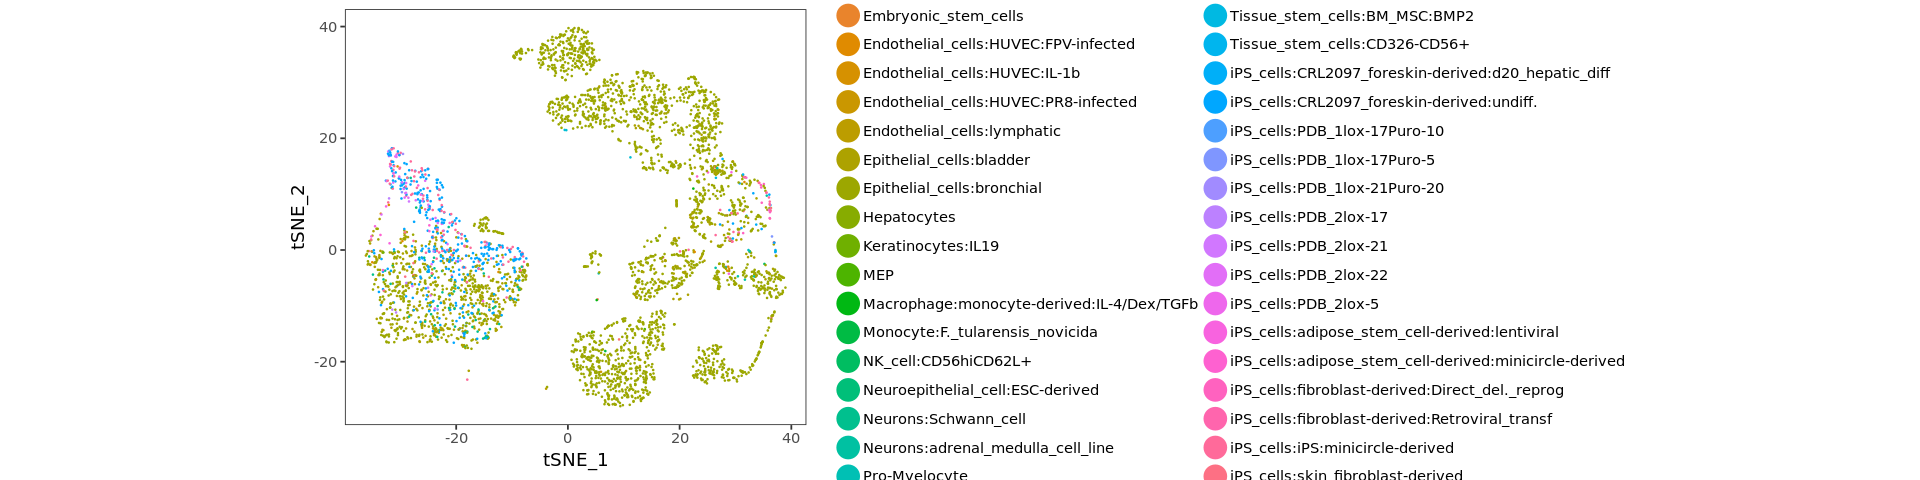

topic
1   1   
2   2   
3   3   
4   4   
5   5   
6   6   
7   7   
8   8   
9   9   
10 10   
11 11   
12 12   
13 13   
   Term                                                                                                                          
1  regulation of transcription from RNA polymerase II promoter involved in myocardial precursor cell differentiation (GO:0003256)
2  monoamine transport (GO:0015844)                                                                                              
3  antigen processing and presentation of exogenous peptide antigen via MHC class II (GO:0019886)                                
4  substantia nigra development (GO:0021762)                                                                                     
5  regulation of keratinocyte apoptotic process (GO:1902172)                                                                     
6  acyl-CoA biosynthetic process (GO:0071616)                                                                                    
7  neutrophil degranulation (GO:0043312)                                                                                         
8  mitotic spindle organization (GO:0007052)                                                                                     
9  positive regulation of cell migration by vascular endothelial growth factor signaling pathway (GO:0038089)                    
10 antigen processing and presentation of exogenous peptide antigen via MHC class I, TAP-independent (GO:0002480)                
11 proteolysis (GO:0006508)                                                                                                      
12 platelet aggregation (GO:0070527)                                                                                             
13 cytokine-mediated signaling pathway (GO:0019221)                                                                              
   Overlap Adjusted.P.value
1  2/8     1.666870e-02    
2  1/7     1.114766e-01    
3  3/98    1.815372e-02    
4  4/44    3.062749e-04    
5  1/7     1.076336e-01    
6  2/15    2.921932e-02    
7  7/480   3.647256e-04    
8  6/75    4.275195e-07    
9  1/8     1.120555e-01    
10 3/10    1.088617e-04    
11 4/292   8.048012e-02    
12 3/34    5.501388e-03    
13 16/634  3.483361e-14    
   Genes                                                                                         
1  GREM1;NOTCH1                                                                                  
2  SLC6A4                                                                                        
3  CD74;HLA-DRA;HLA-DRB1                                                                         
4  DYNLL1;CALM2;ACTB;COX6B1                                                                      
5  ZFP36                                                                                         
6  SCD;FASN                                                                                      
7  CSTB;SLPI;COTL1;S100A9;S100A8;LTF;S100A7                                                      
8  CCNB1;PRC1;NUF2;STMN1;BIRC5;SPC25                                                             
9  HSPB1                                                                                         
10 HLA-B;HLA-C;B2M                                                                               
11 CPM;PCSK1;CPB1;CPE                                                                            
12 HSPB1;ACTB;MYL12A                                                                             
13 IFNB1;ISG15;IFIT1;IFIT3;IFIT2;OASL;CXCL10;IGHG4;CXCL11;IGHG1;IFNL2;IFNL1;IRF1;CCL5;IFNL3;BIRC3

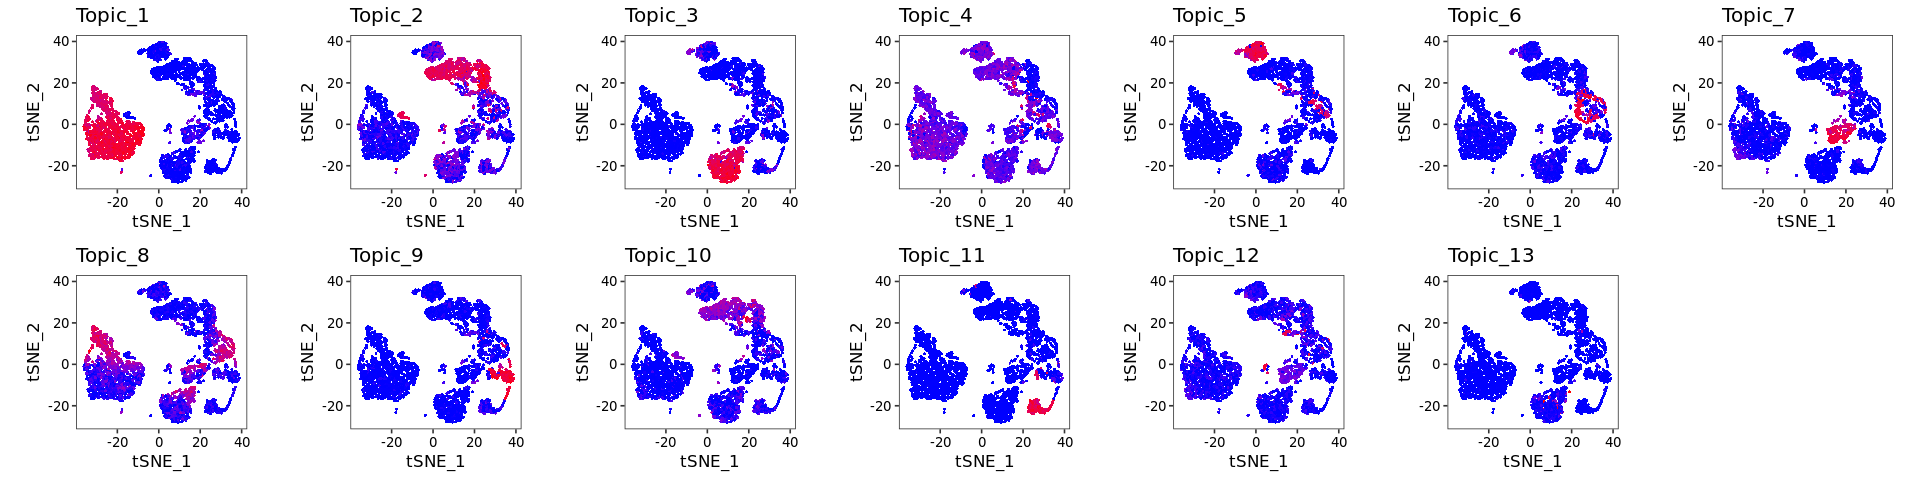

In [270]:
genes1=extract_genes(gom=gom,sub=sub)
genes1[[2]]

In [271]:
malignant_genes=prep_genes(genes1,c(3,6,7,8,9,10))
table(malignant_genes$priority)


 0  1 
16  6 

#### T_cells

[1] "T_cells T_cells T_cells"


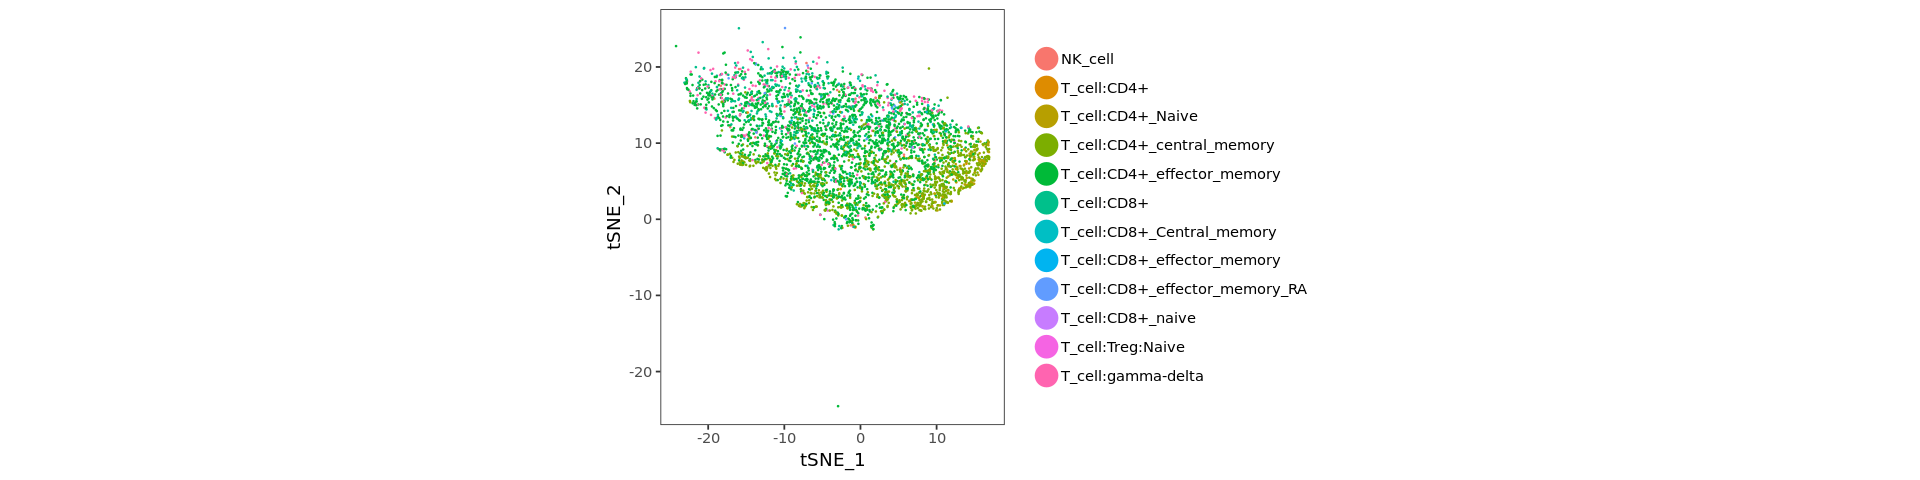

topic
1 1    
2 2    
3 3    
  Term                                                                            
1 nuclear-transcribed mRNA catabolic process, nonsense-mediated decay (GO:0000184)
2 regulation of natural killer cell chemotaxis (GO:2000501)                       
3 type I interferon signaling pathway (GO:0060337)                                
  Overlap Adjusted.P.value Genes                        
1 5/113   1.679794e-04     RPL13;RPSA;EIF3E;PABPC1;RPL18
2 4/8     3.392546e-08     CCL5;CCL4;CCL3;XCL1          
3 4/66    1.693518e-04     ISG15;HLA-A;IFIT1;IFIT3

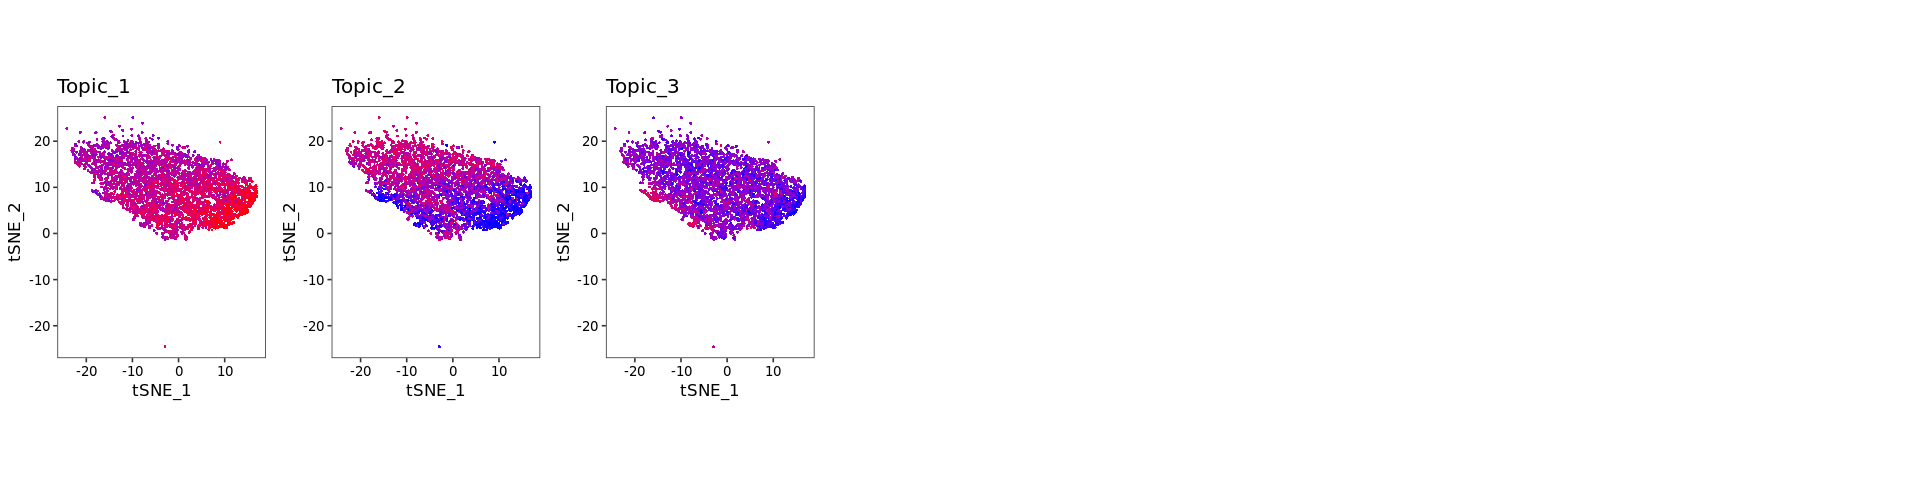

In [194]:
genes2=extract_genes(gom=gom,sub=sub)
genes2[[2]]

In [195]:
T_genes=prep_genes(genes2,c(2,3))
table(T_genes$priority)


0 1 
6 2 

#### NK cells

[1] "NK_cell NK_cell NK_cell"


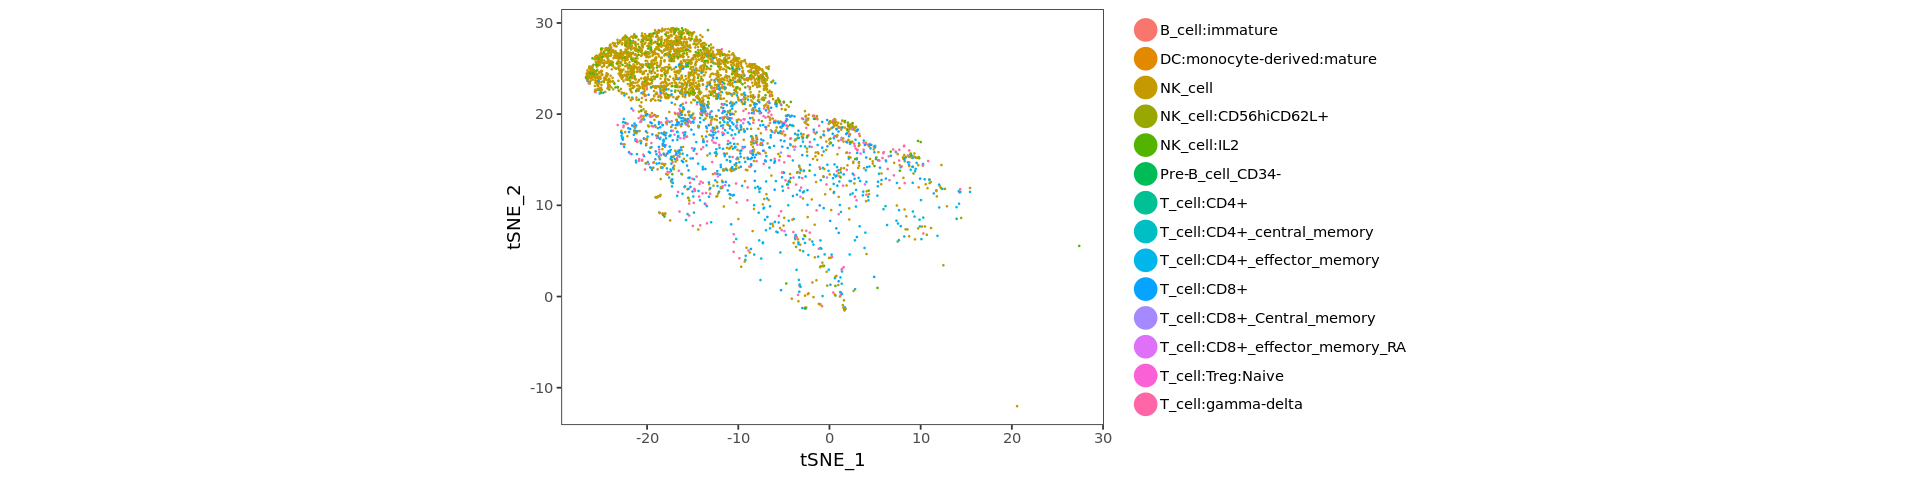

topic Term                                                      Overlap
1 1     positive regulation of lymphocyte migration (GO:2000403)  3/18   
2 2     regulation of natural killer cell chemotaxis (GO:2000501) 4/8    
3 3     retina homeostasis (GO:0001895)                           5/39   
  Adjusted.P.value Genes                      
1 8.419807e-04     SPN;CCL5;CCL4              
2 1.203901e-07     CCL5;CCL4;CCL3;XCL1        
3 2.961708e-07     IGHG3;IGKC;IGHA1;B2M;JCHAIN

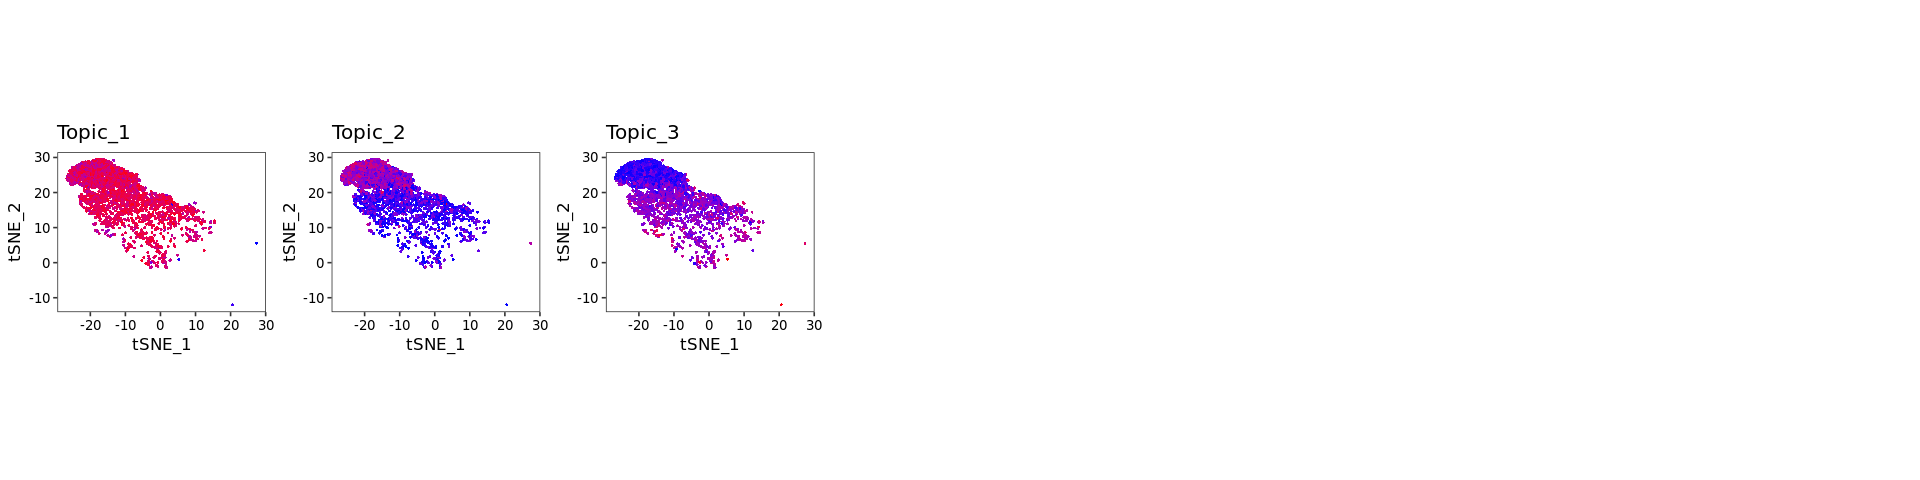

In [199]:
genes3=extract_genes(gom=gom,sub=sub)
genes3[[2]]

In [200]:
NK_genes=prep_genes(genes,c(1,2))
table(NK_genes$priority)


0 1 
7 2 

#### Fibroblasts

[1] "Fibroblasts Fibroblasts Fibroblasts"


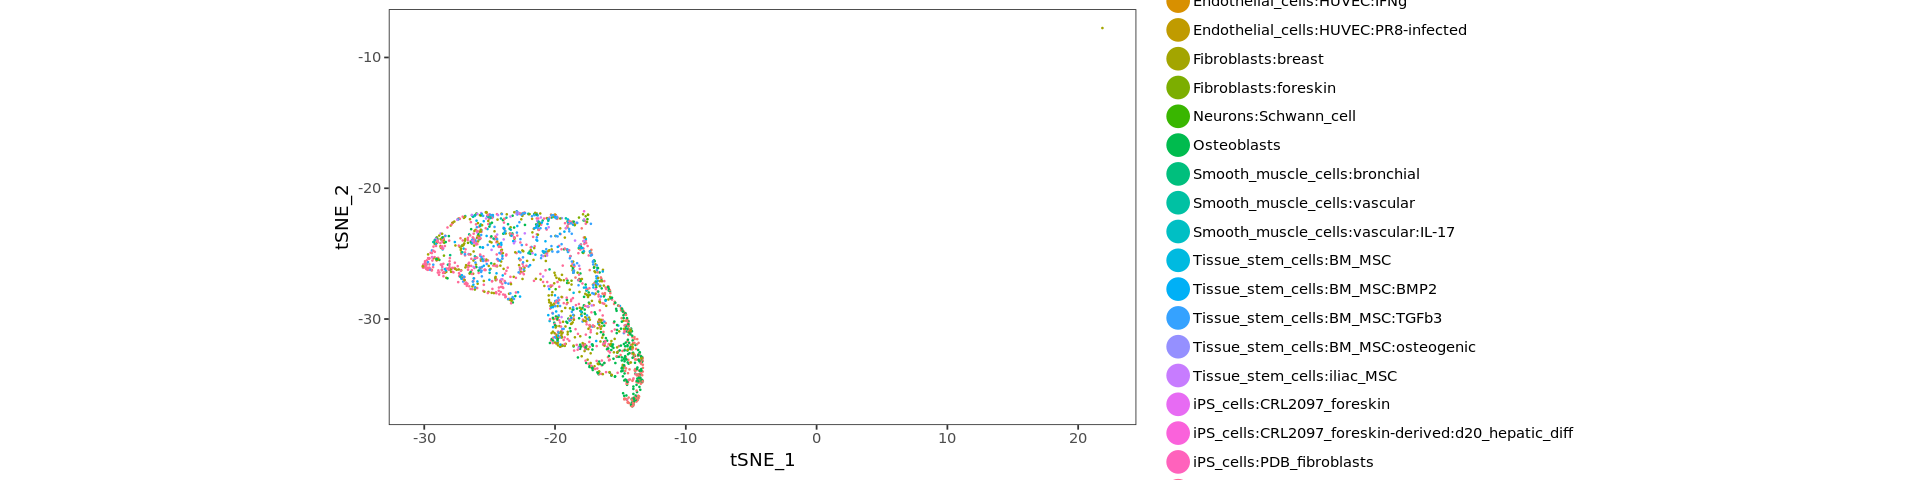

topic Term                                                Overlap
1 1     sequestering of actin monomers (GO:0042989)         3/11   
2 2     muscle contraction (GO:0006936)                     7/138  
3 3     extracellular matrix organization (GO:0030198)      13/230 
4 4     cellular response to cytokine stimulus (GO:0071345) 11/457 
  Adjusted.P.value
1 1.933964e-04    
2 4.009811e-07    
3 1.406165e-15    
4 1.694293e-08    
  Genes                                                                          
1 GSN;TMSB4X;TMSB10                                                              
2 ACTA2;MYL6;TPM2;MYH11;MYL9;ACTG2;MYLK                                          
3 LUM;COL11A1;MMP2;COL12A1;DCN;MFAP5;COMP;COL1A1;COL3A1;COL1A2;MMP13;SPP1;COL10A1
4 CXCL10;IGHG4;IGHG1;CCL21;BGN;CCL2;VIM;CCL19;TIMP1;MMP9;DCN

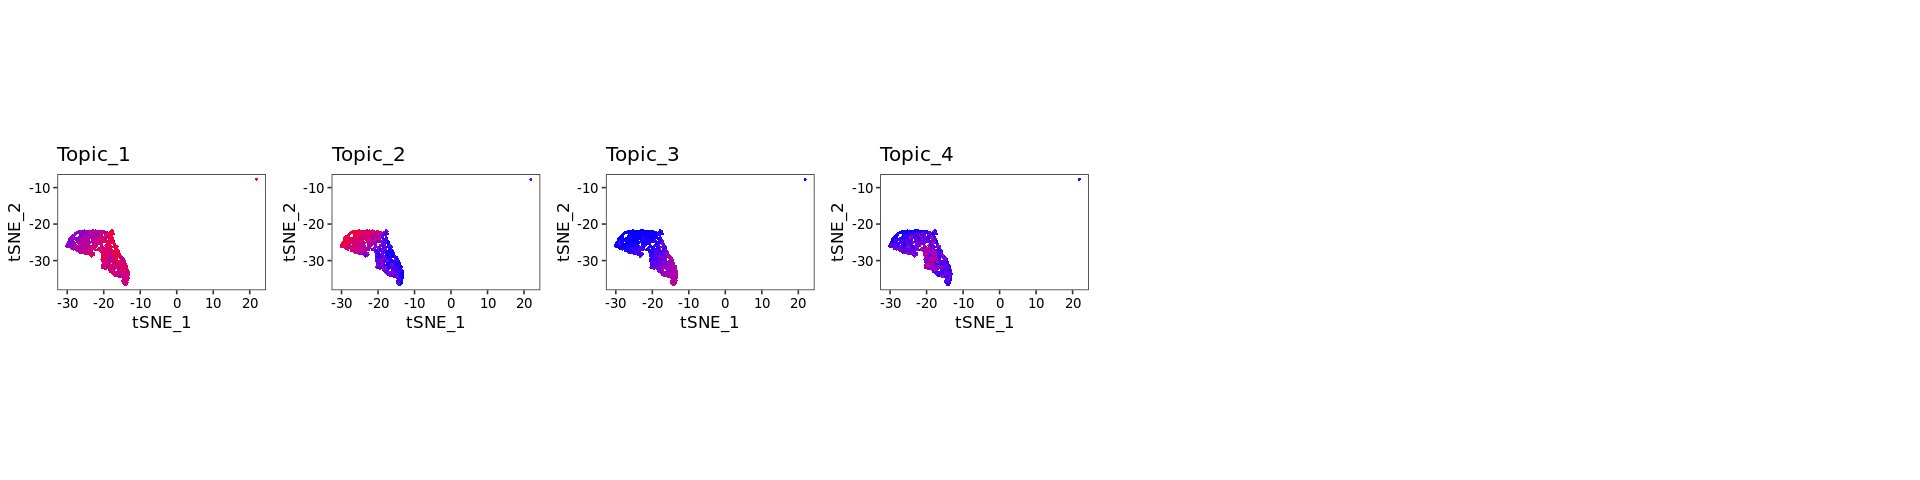

In [204]:
genes4=extract_genes(gom=gom,sub=sub)
genes4[[2]]

In [205]:
Fibroblast_genes=prep_genes(genes4,c(1,2,3,4))
table(Fibroblast_genes$priority)


 0  1 
30  4 

#### Endothelial

[1] "Endothelial Endothelial Endothelial"


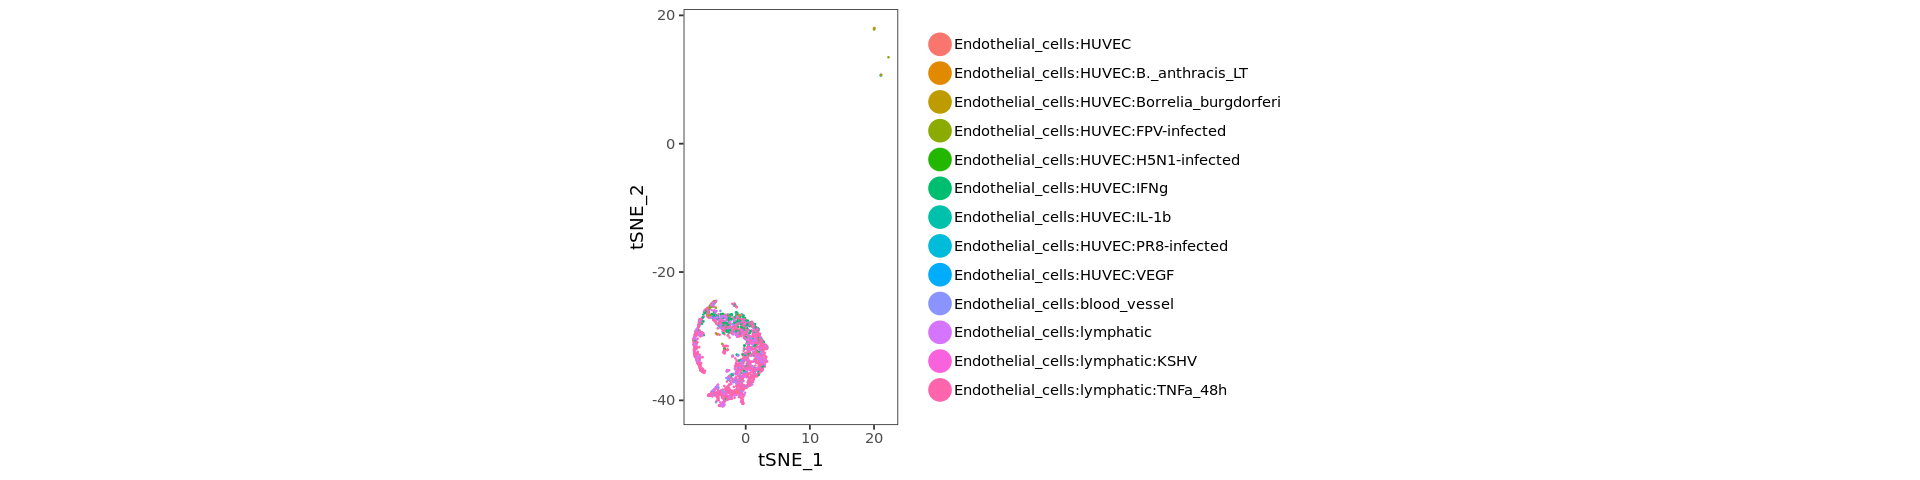

topic
1 1    
2 2    
3 3    
4 4    
5 5    
  Term                                                                                          
1 antigen processing and presentation of endogenous peptide antigen (GO:0002483)                
2 negative regulation of smooth muscle cell proliferation (GO:0048662)                          
3 antigen processing and presentation of exogenous peptide antigen via MHC class II (GO:0019886)
4 positive regulation of receptor-mediated endocytosis (GO:0048260)                             
5 pattern recognition receptor signaling pathway (GO:0002221)                                   
  Overlap Adjusted.P.value Genes                         
1 2/7     0.0172765226     B2M;HLA-E                     
2 3/28    0.0032003362     IGFBP5;IGFBP3;APLN            
3 4/98    0.0016031806     CD74;HLA-DRB5;HLA-DRA;HLA-DRB1
4 3/42    0.0069040264     CD63;B2M;CLU                  
5 4/49    0.0003915753     CTSL;CD14;CD36;LGMN

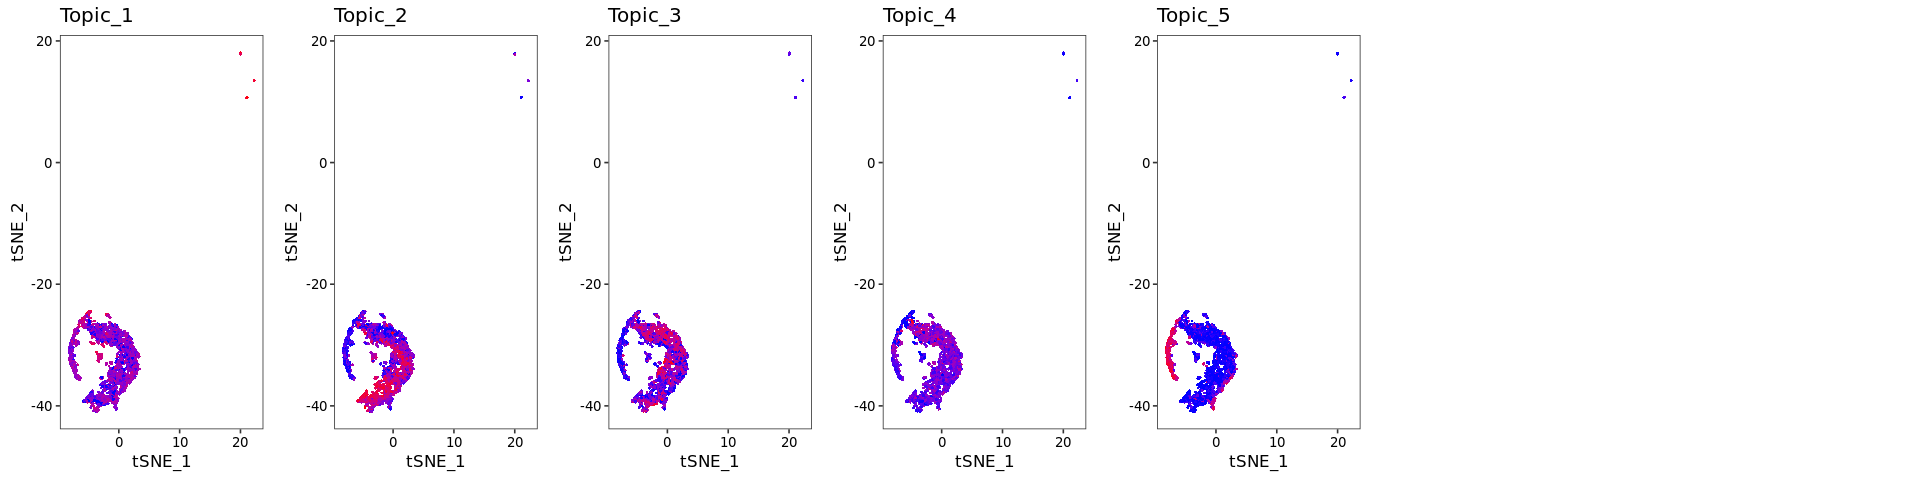

In [209]:
genes5=extract_genes(gom=gom,sub=sub)
genes5[[2]]

In [210]:
Endothelial_genes=prep_genes(genes5,c(1,2,3,4,5))
table(Endothelial_genes$priority)


 0  1 
11  5 

#### MonoMacro

[1] "MonoMacro MonoMacro MonoMacro"


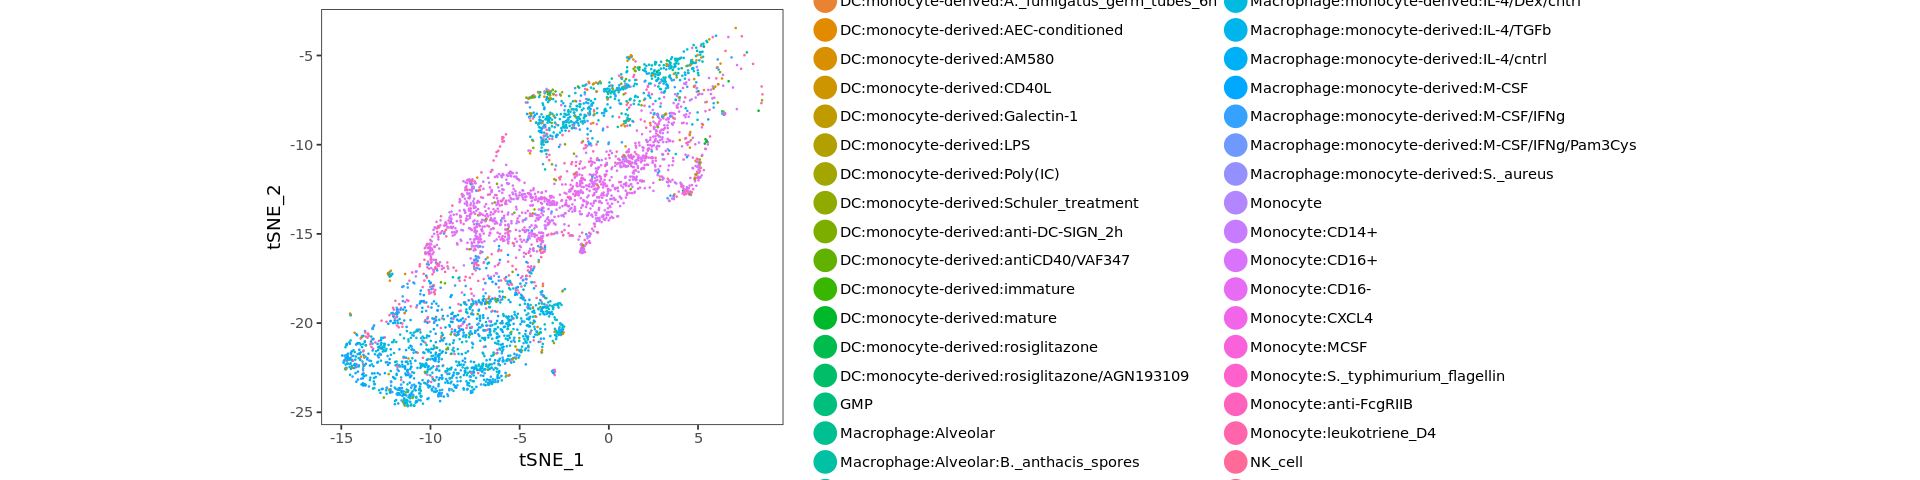

topic
1 1    
2 2    
3 3    
4 4    
5 5    
6 6    
7 7    
  Term                                                                                                          
1 neutrophil degranulation (GO:0043312)                                                                         
2 antigen processing and presentation of exogenous peptide antigen via MHC class II (GO:0019886)                
3 neutrophil degranulation (GO:0043312)                                                                         
4 cellular response to interferon-gamma (GO:0071346)                                                            
5 antigen processing and presentation of exogenous peptide antigen via MHC class I, TAP-independent (GO:0002480)
6 hydrogen peroxide metabolic process (GO:0042743)                                                              
7 extracellular matrix disassembly (GO:0022617)                                                                 
  Overlap Adjusted.P.value
1 12/480  2.931514e-10    
2 11/98   1.341787e-16    
3 9/480   4.090070e-06    
4 6/117   1.111404e-05    
5 2/10    5.683367e-03    
6 4/21    7.845951e-06    
7 8/79    9.390324e-11    
  Genes                                                                                       
1 CST3;FGR;EEF1A1;FCN1;CDA;STXBP2;S100A12;FOLR3;LYZ;S100A9;S100A8;FTL                         
2 CD74;HLA-DMA;HLA-DRB5;HLA-DPB1;HLA-DRA;HLA-DQA2;HLA-DQA1;HLA-DQB2;HLA-DRB1;HLA-DPA1;HLA-DQB1
3 LGALS3;GRN;FTH1;PSAP;CTSZ;LYZ;S100A9;CTSD;FTL                                               
4 VCAM1;CCL2;HLA-DRA;B2M;HLA-DRB1;HLA-DPA1                                                    
5 HLA-A;B2M                                                                                   
6 GPX1;HBB;CYBA;HBA1                                                                          
7 MMP12;MMP7;CTSK;FN1;SPP1;ADAM8;TPSAB1;MMP9

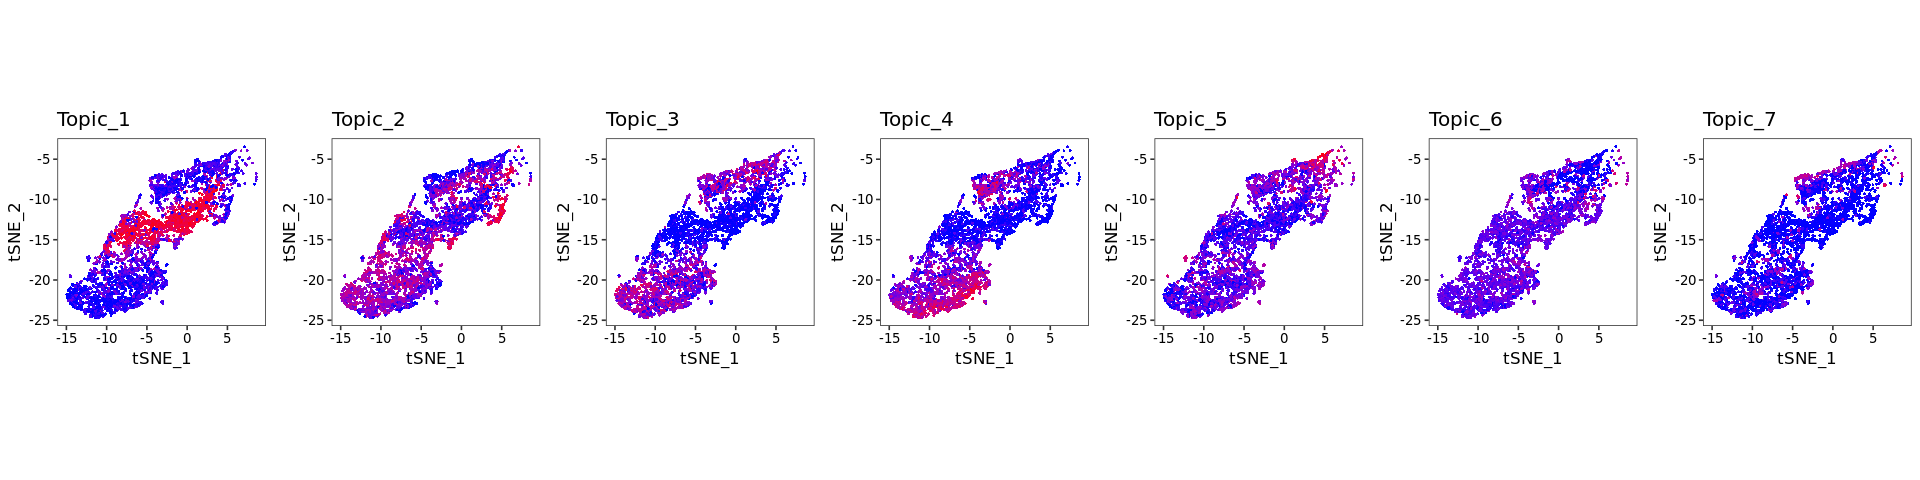

In [251]:
genes6=extract_genes(gom=gom,sub=sub)
genes6[[2]]

In [252]:
Mono_genes=prep_genes(genes6,c(1,4,5,7))
table(Mono_genes$priority)


 0  1 
24  4 

#### B_cells

[1] "B_cell B_cell B_cell"


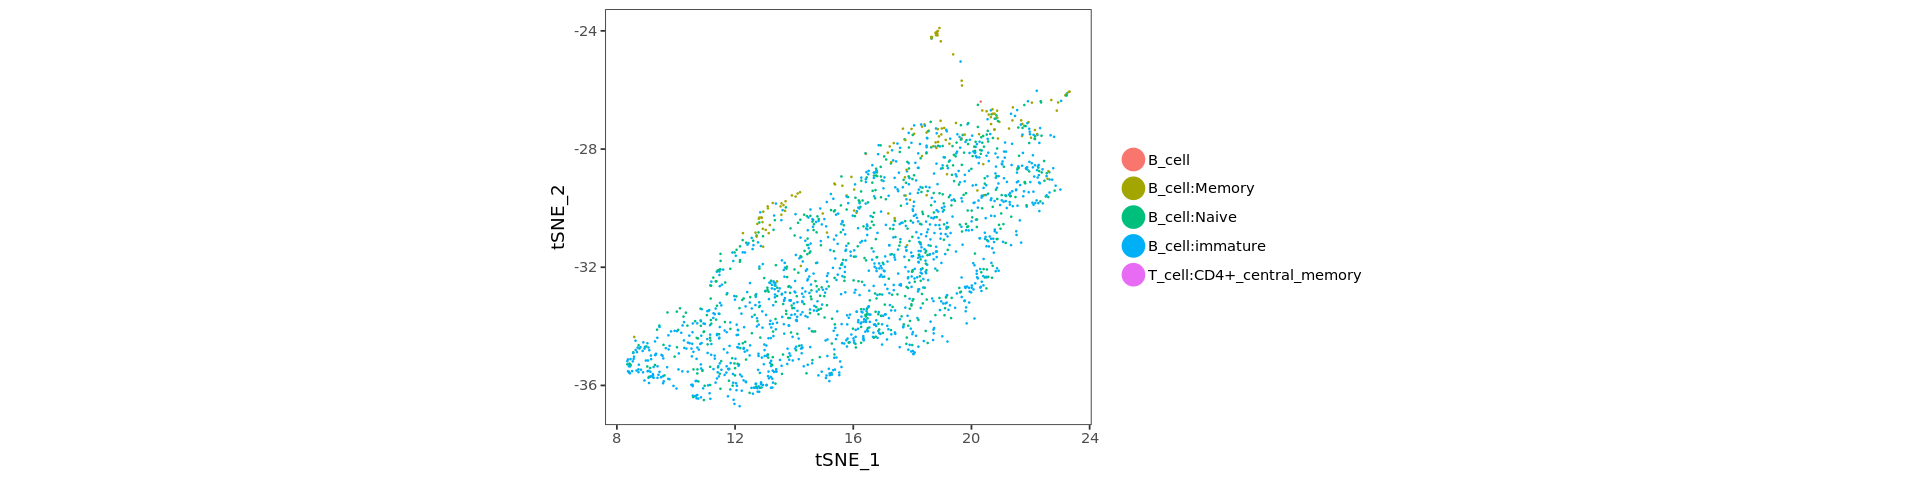

topic Term                                             Overlap
1 1     translation (GO:0006412)                         5/233  
2 2     cytokine-mediated signaling pathway (GO:0019221) 8/634  
3 3     B cell receptor signaling pathway (GO:0050853)   6/105  
  Adjusted.P.value Genes                                      
1 8.591979e-03     EEF1B2;EEF1A1;RPL13;RPSA;RPL18             
2 1.659648e-03     NFKBIA;EGR1;TMSB4X;HLA-B;TIMP1;FOS;JUNB;B2M
3 1.496105e-06     CD79B;IGKC;IGLC7;IGLC6;IGLC3;IGLC2

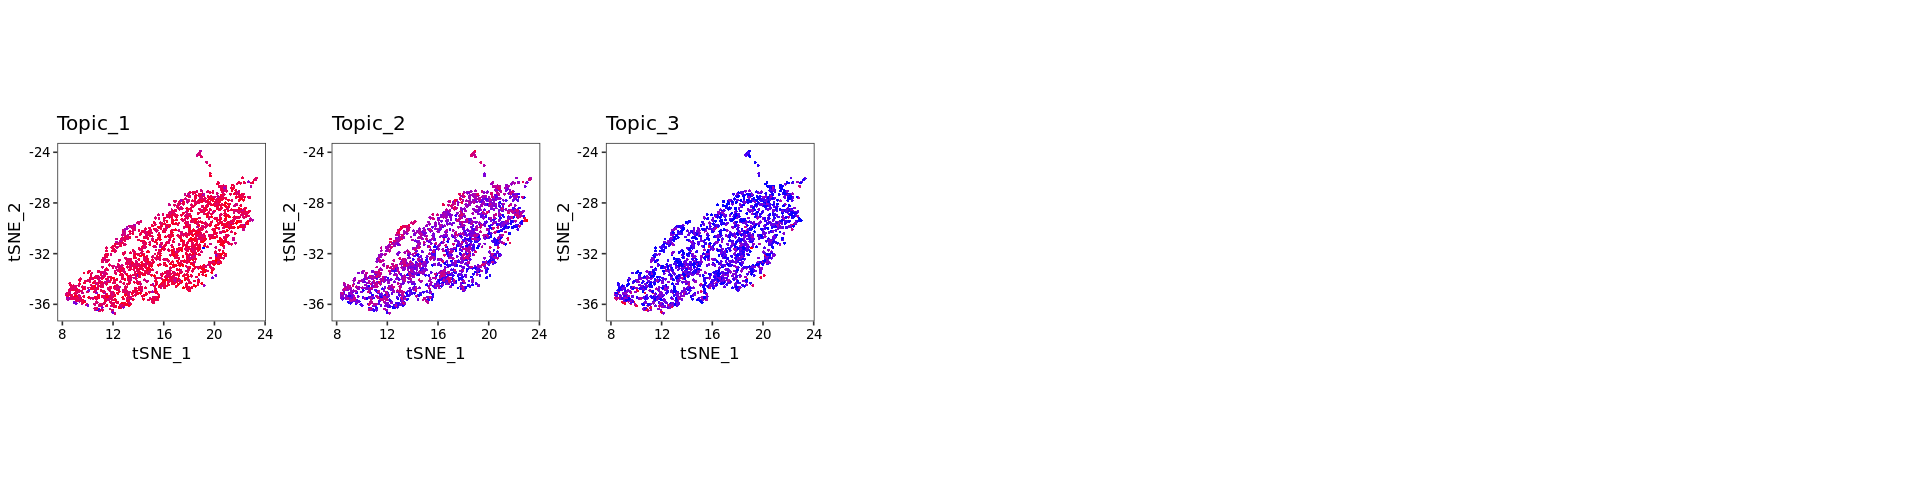

In [229]:
genes7=extract_genes(gom=gom,sub=sub)
genes7[[2]]

In [230]:
B_genes=prep_genes(genes7,c(2,3))
table(B_genes$priority)


 0  1 
12  2 

#### Plasma cells

[1] "Plasma_cell Plasma_cell Plasma_cell"


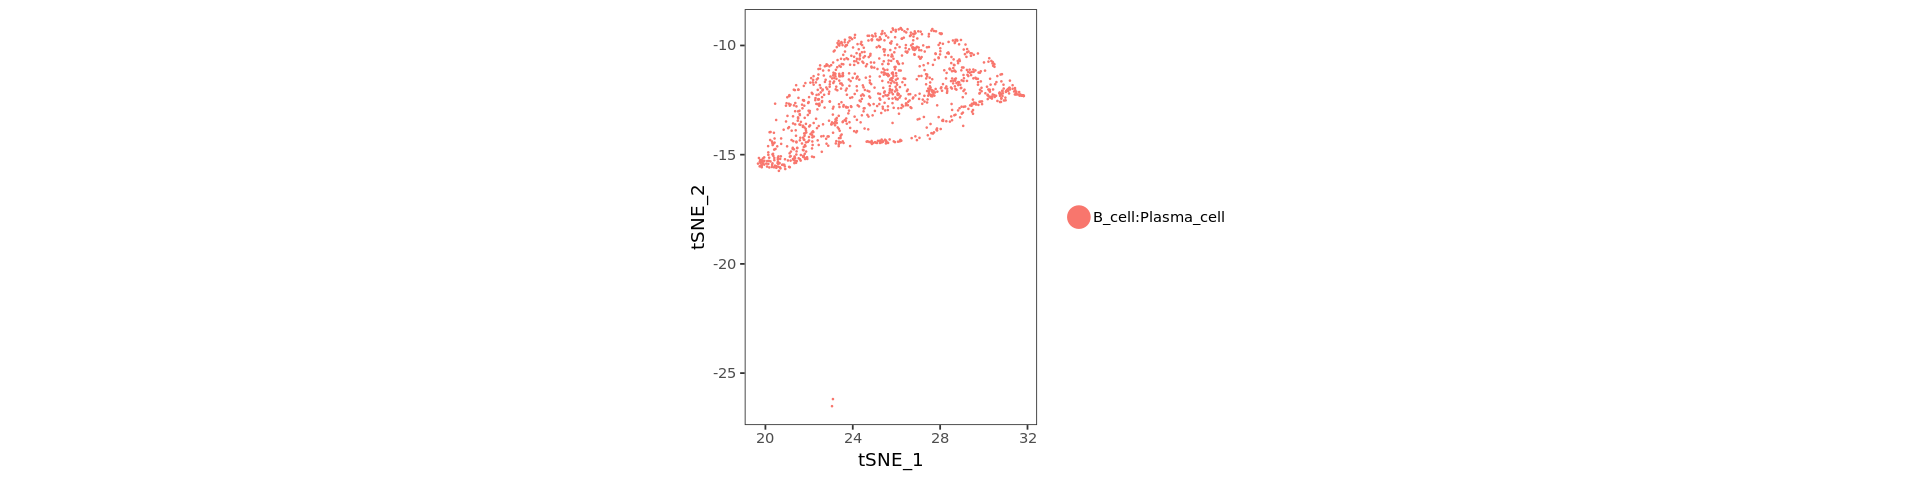

topic
1   1   
2   2   
3   3   
4   4   
5   5   
6   6   
7   7   
8   8   
9   9   
10 10   
   Term                                                                                                          
1  Fc receptor signaling pathway (GO:0038093)                                                                    
2  complement activation, classical pathway (GO:0006958)                                                         
3  positive regulation of respiratory burst (GO:0060267)                                                         
4  regulation of B cell activation (GO:0050864)                                                                  
5  positive regulation of B cell activation (GO:0050871)                                                         
6  mitochondrial ATP synthesis coupled proton transport (GO:0042776)                                             
7  antigen processing and presentation of exogenous peptide antigen via MHC class I, TAP-independent (GO:0002480)
8  complement activation, classical pathway (GO:0006958)                                                         
9  regulation of immune effector process (GO:0002697)                                                            
10 antigen receptor-mediated signaling pathway (GO:0050851)                                                      
   Overlap Adjusted.P.value
1  9/184   8.904549e-10    
2  11/124  2.383537e-15    
3  3/9     2.213093e-05    
4  6/96    1.751010e-06    
5  6/120   6.882553e-06    
6  2/22    8.753732e-03    
7  5/10    6.294858e-10    
8  5/124   1.582512e-04    
9  5/115   4.227006e-05    
10 7/258   3.680335e-05    
   Genes                                                                              
1  NFKBIA;JUN;IGKV2D-28;IGKC;IGLV2-14;IGKV1-12;IGKV3-15;IGLV3-1;FOS                   
2  IGHG3;IGLV6-57;IGLV2-14;IGLV2-23;IGLC6;IGLC3;IGHV1-24;IGHV4-39;IGLC2;IGHA1;IGLV3-19
3  IGHA1;IGHA2;JCHAIN                                                                 
4  IGHG3;IGHG4;IGHG1;IGKC;IGLC7;MZB1                                                  
5  CD74;IGHM;XBP1;IGKC;IGLC7;IGLC2                                                    
6  ATP5E;ATP5L                                                                        
7  HLA-B;HLA-C;HLA-A;B2M;HLA-E                                                        
8  IGLV1-40;IGLV1-51;IGLC7;IGLV3-21;IGLC3                                             
9  IGHG3;IGHG1;IGHG2;IGKV2-29;IGLV2-23                                                
10 IGHG3;CD79A;IGHG4;IGHG1;UBC;IGHE;CD3G

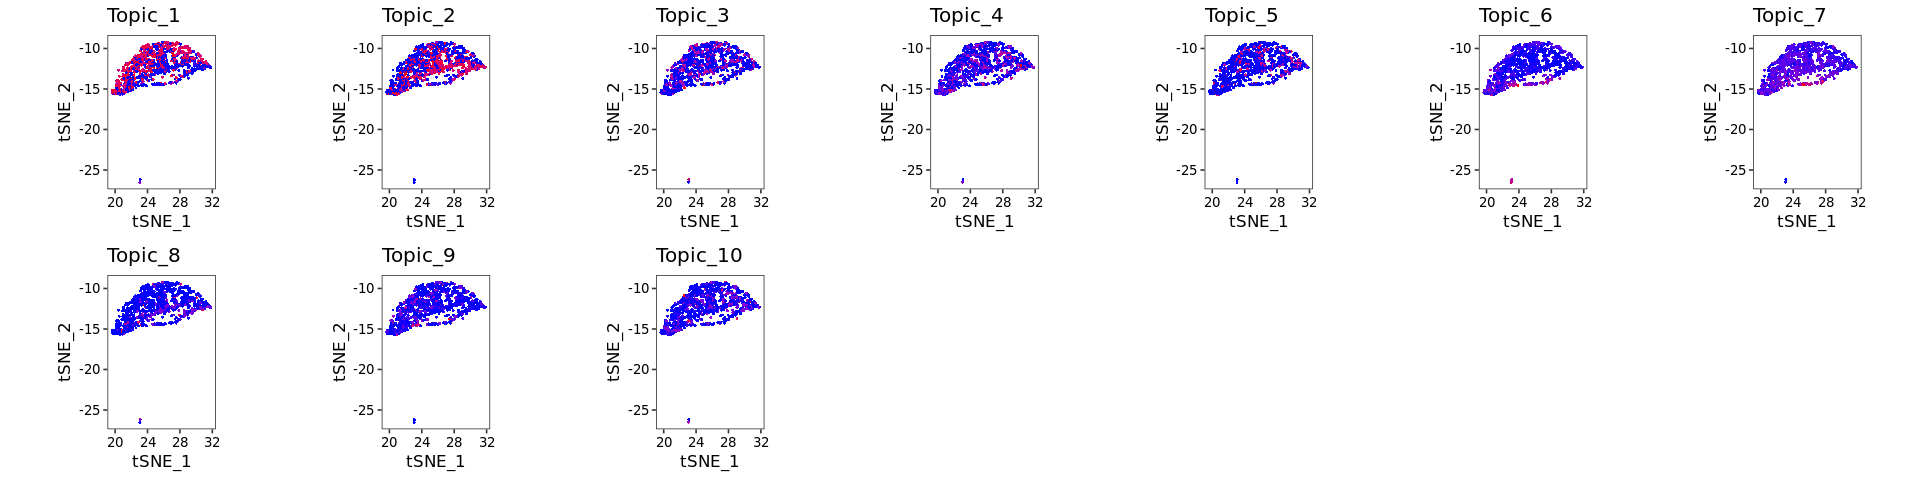

In [243]:
genes8=extract_genes(gom=gom,sub=sub)
genes8[[2]]

In [247]:
Plasma_genes=prep_genes(genes8,c(1,5))
table(Plasma_genes$priority)


 0  1 
13  2 

### Combine all selected genes and save

In [272]:
all_sel_genes=rbindlist(list(malignant_genes,T_genes,NK_genes,Endothelial_genes,Fibroblast_genes,Mono_genes,B_genes,Plasma_genes))
nrow(all_sel_genes)
length(unique(all_sel_genes$gene))

[1] 146

[1] 115

In [273]:
write.table(all_sel_genes,"topic_genes_combined.tsv",sep="\t",quote=FALSE,row.names=FALSE)

In [274]:
write.table(all_sel_genes[,c("gene","type","priority","assay"),],"../00_spatial_probes/topics_fresh.tsv",sep="\t",quote=FALSE,row.names=FALSE)

### Plot expression of selected genes

In [275]:
all_cell_types=c("Epithelial_cells","Epithelial_stem","Fibroblasts","Endothelial_cells","Macrophage","Monocyte","NK_cell","T_cells","B_cell","Plasma_cell")

In [276]:
genes_order=order_genes(cs,svals = all_cell_types,genes = unique(all_sel_genes$gene))

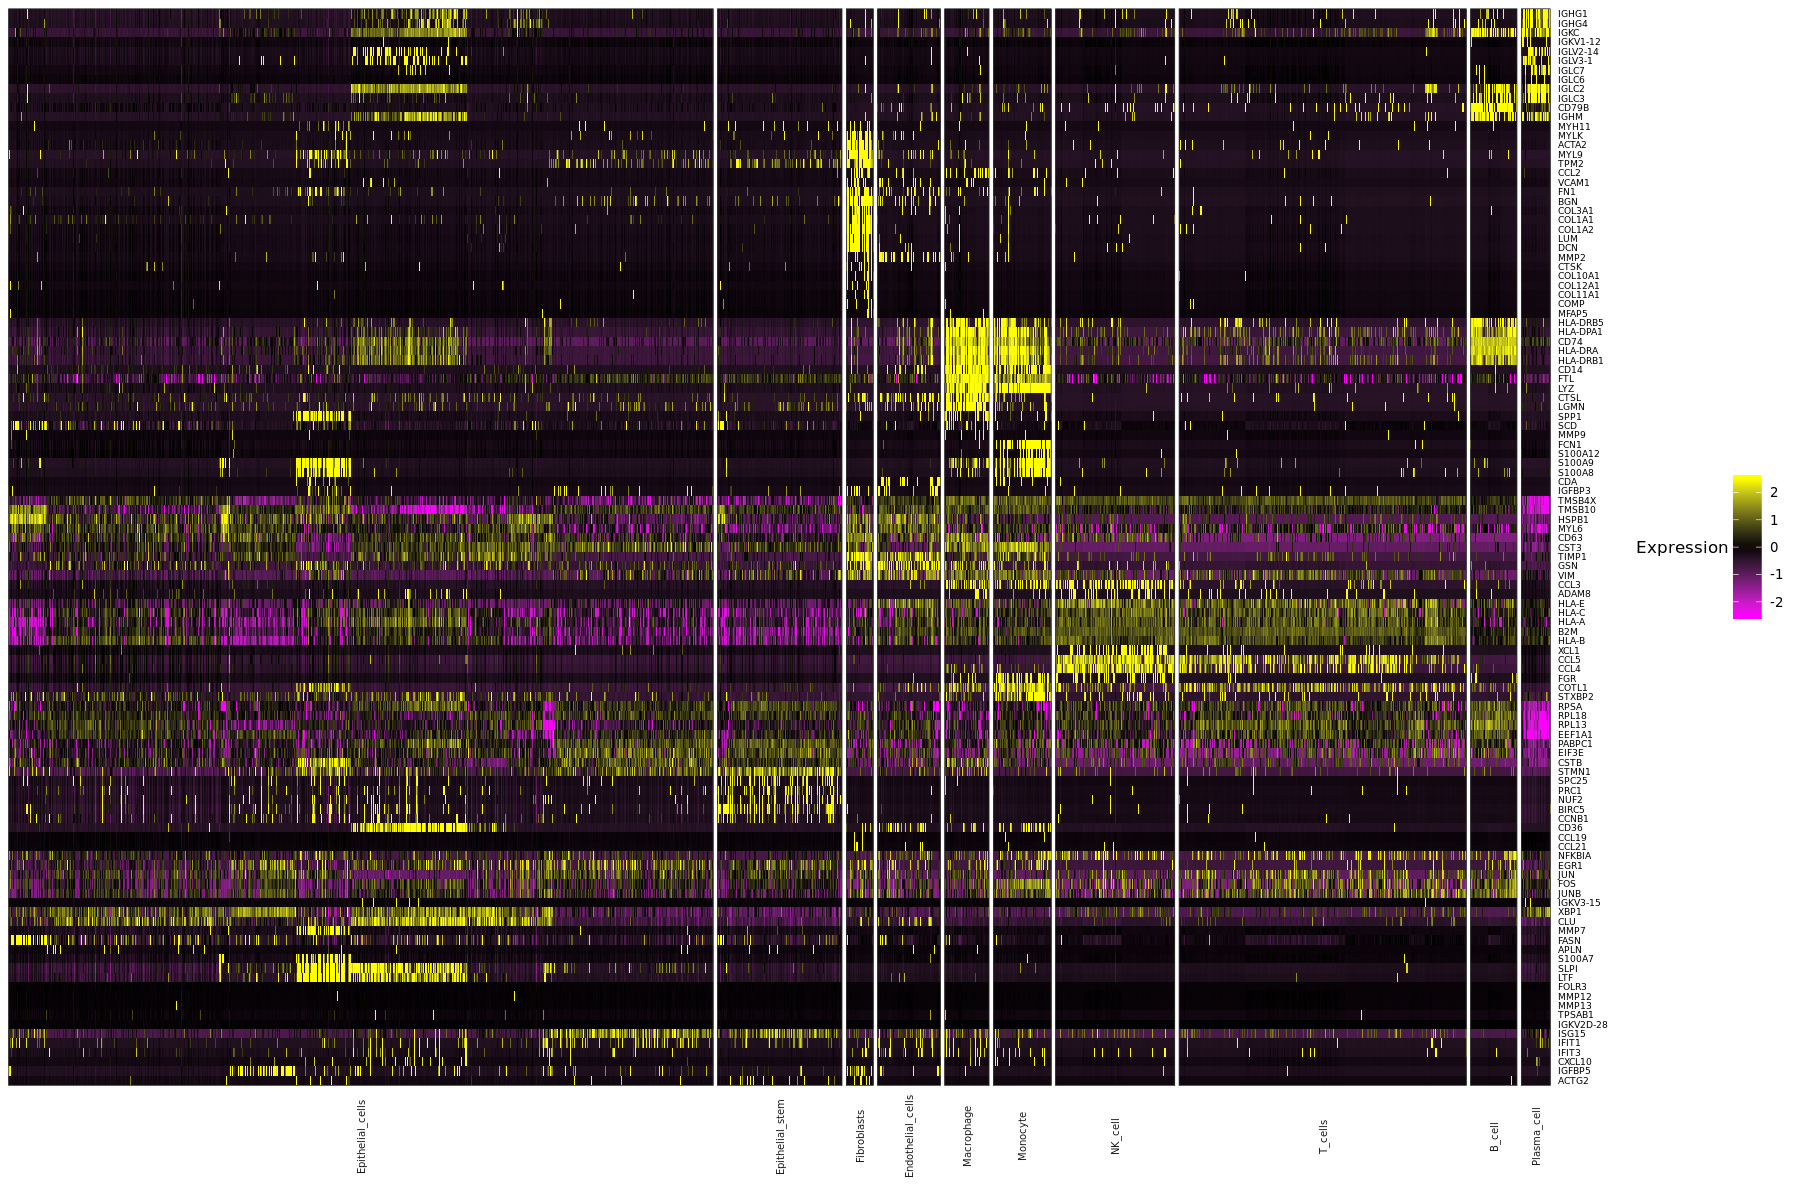

In [281]:
options(repr.plot.width = 15, repr.plot.height = 10)
DoHeatmap(SubsetData(cs,subset.name = "labels",accept.value = all_cell_types,max.cells.per.ident = Inf),group.cex = 6,group.order = all_cell_types,slim.col.label = TRUE,
          group.label.rot = TRUE, draw.line = TRUE,genes.use = genes_order$gene,group.by = "labels",cex.row = 5.5,cex.col = 0)

### Previous stuff

[1] "malignant"


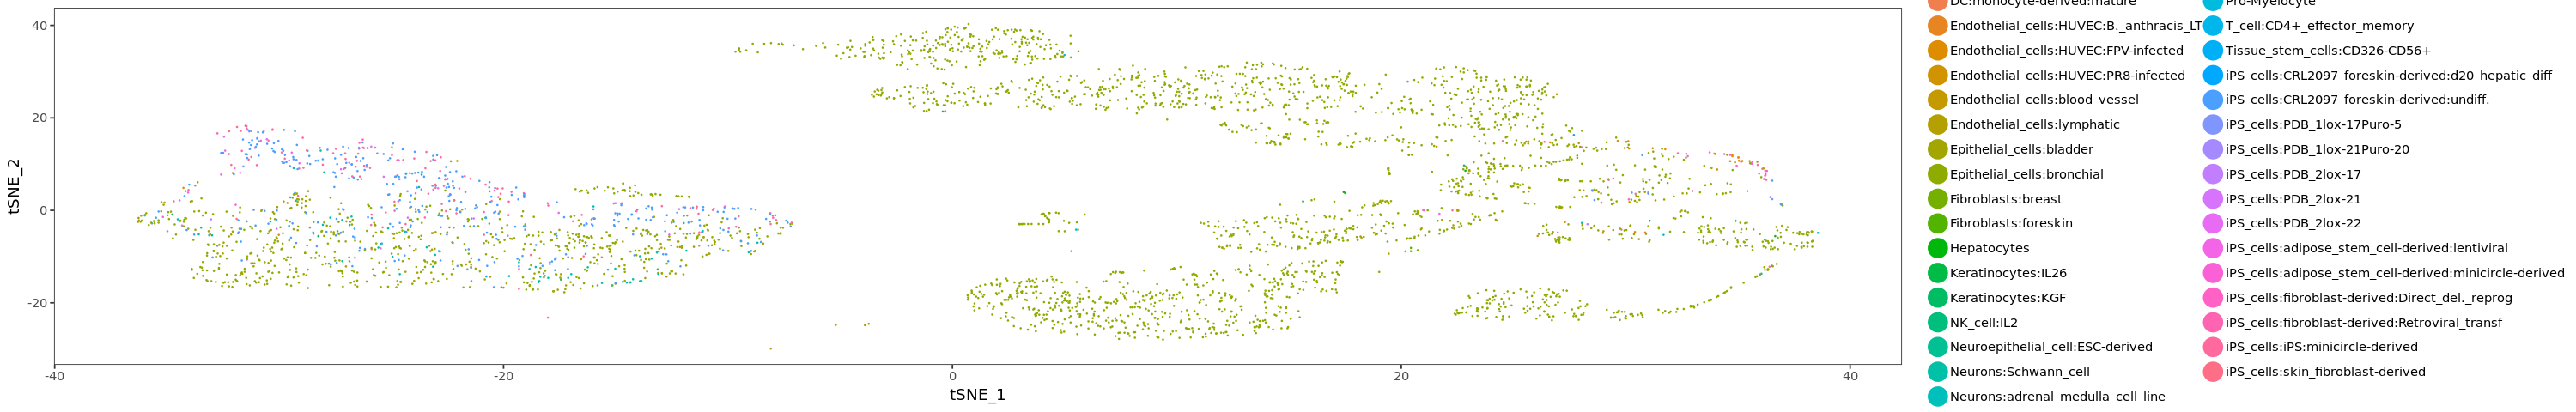

topic
1   1    
2   1    
3   2    
4   2    
5   3    
6   3    
7   3    
8   3    
9   4    
10  4    
... ...  
32   9   
33   9   
34   9   
35  10   
36  10   
37  10   
38  10   
39  10   
40  10   
41  10   
    Term                                                                                                                          
1   regulation of transcription from RNA polymerase II promoter involved in myocardial precursor cell differentiation (GO:0003256)
2   regulation of transcription from RNA polymerase II promoter involved in myocardial precursor cell differentiation (GO:0003256)
3   membrane raft assembly (GO:0001765)                                                                                           
4   membrane raft assembly (GO:0001765)                                                                                           
5   mitochondrial ATP synthesis coupled proton transport (GO:0042776)                                                             
6   mitochondrial ATP synthesis coupled proton transport (GO:0042776)                                                             
7   mitochondrial ATP synthesis coupled proton transport (GO:0042776)                                                             
8   mitochondrial ATP synthesis coupled proton transport (GO:0042776)                                                             
9   phagocytosis, engulfment (GO:0006911)                                                                                         
10  phagocytosis, engulfment (GO:0006911)                                                                                         
... ...                                                                                                                           
32  retina homeostasis (GO:0001895)                                                                                               
33  retina homeostasis (GO:0001895)                                                                                               
34  retina homeostasis (GO:0001895)                                                                                               
35  type I interferon signaling pathway (GO:0060337)                                                                              
36  type I interferon signaling pathway (GO:0060337)                                                                              
37  type I interferon signaling pathway (GO:0060337)                                                                              
38  type I interferon signaling pathway (GO:0060337)                                                                              
39  type I interferon signaling pathway (GO:0060337)                                                                              
40  type I interferon signaling pathway (GO:0060337)                                                                              
41  type I interferon signaling pathway (GO:0060337)                                                                              
    Overlap Adjusted.P.value V1     
1   2/8     1.641701e-02     GREM1  
2   2/8     1.641701e-02     NOTCH1 
3   2/7     2.800925e-02     ANXA2  
4   2/7     2.800925e-02     S100A10
5   4/22    3.286499e-05     ATP5G3 
6   4/22    3.286499e-05     ATP5G2 
7   4/22    3.286499e-05     ATP5O  
8   4/22    3.286499e-05     ATP5L  
9   6/105   1.821032e-05     IGHG3  
10  6/105   1.821032e-05     IGHM   
... ...     ...              ...    
32  4/39    2.621652e-04     LYZ    
33  4/39    2.621652e-04     ACTB   
34  4/39    2.621652e-04     LTF    
35  7/66    5.565877e-08     RSAD2  
36  7/66    5.565877e-08     IFI27  
37  7/66    5.565877e-08     ISG15  
38  7/66    5.565877e-08     IFIT1  
39  7/66    5.565877e-08     IFIT3  
40  7/66    5.565877e-08     IFIT2  
41  7/66    5.565877e-08     OASL

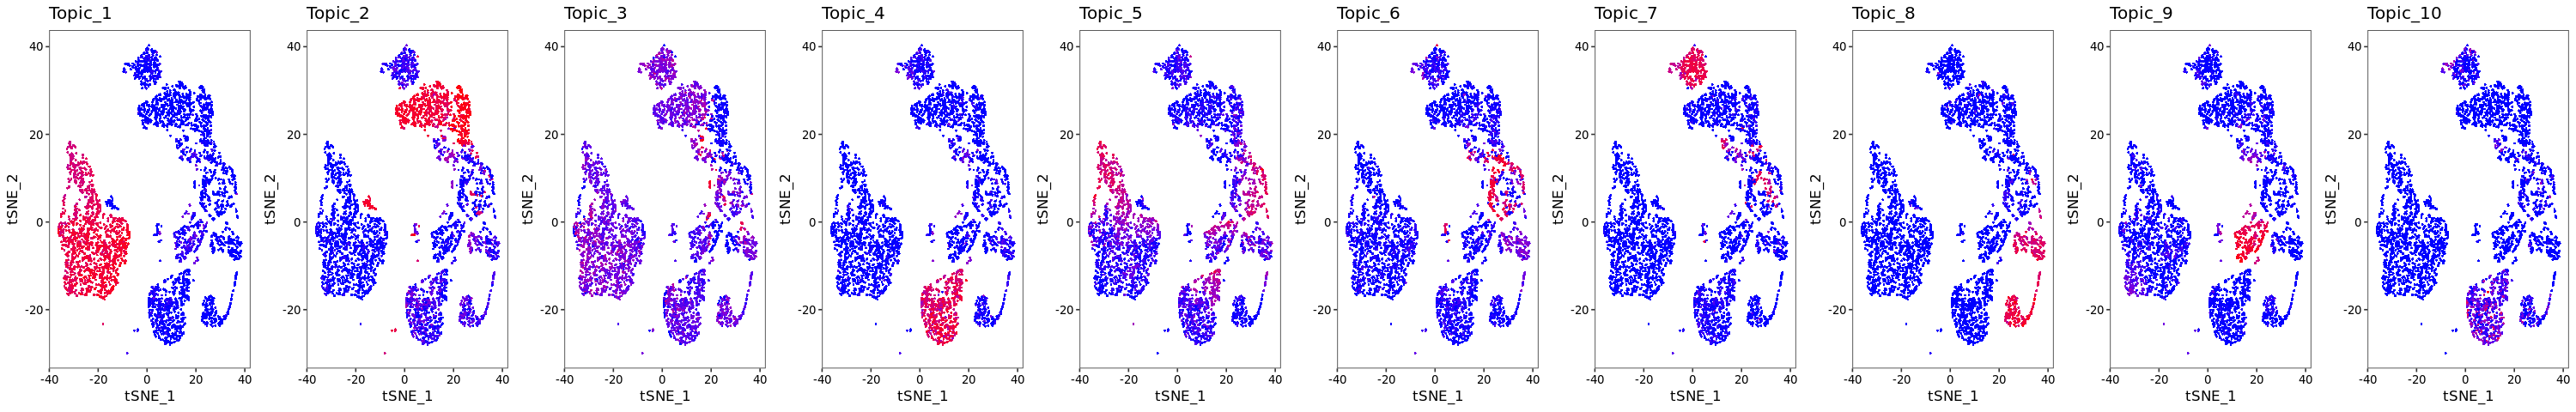

In [59]:
genes=extract_genes()
genes

[1] "T_cells"


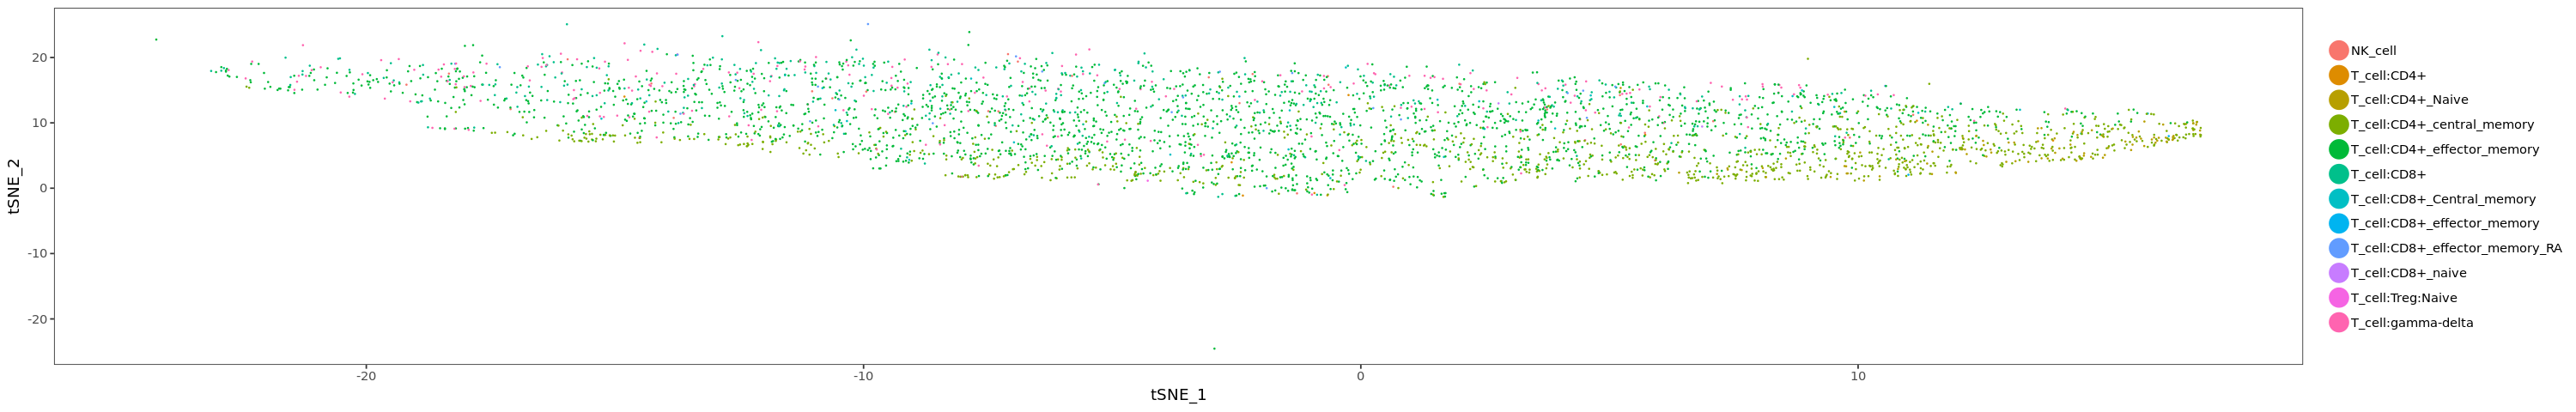

topic
1   1    
2   1    
3   1    
4   1    
5   1    
6   1    
7   2    
8   2    
9   2    
10  2    
... ...  
37  3    
38  3    
39  3    
40  3    
41  3    
42  3    
43  3    
44  3    
45  3    
46  3    
    Term                                                                      
1   formation of translation preinitiation complex (GO:0001731)               
2   formation of translation preinitiation complex (GO:0001731)               
3   rRNA-containing ribonucleoprotein complex export from nucleus (GO:0071428)
4   rRNA-containing ribonucleoprotein complex export from nucleus (GO:0071428)
5   rRNA transport (GO:0051029)                                               
6   rRNA transport (GO:0051029)                                               
7   regulation of natural killer cell chemotaxis (GO:2000501)                 
8   regulation of natural killer cell chemotaxis (GO:2000501)                 
9   regulation of natural killer cell chemotaxis (GO:2000501)                 
10  regulation of natural killer cell chemotaxis (GO:2000501)                 
... ...                                                                       
37  cytokine-mediated signaling pathway (GO:0019221)                          
38  cytokine-mediated signaling pathway (GO:0019221)                          
39  cytokine-mediated signaling pathway (GO:0019221)                          
40  cytokine-mediated signaling pathway (GO:0019221)                          
41  cytokine-mediated signaling pathway (GO:0019221)                          
42  cytokine-mediated signaling pathway (GO:0019221)                          
43  cytokine-mediated signaling pathway (GO:0019221)                          
44  cytokine-mediated signaling pathway (GO:0019221)                          
45  cytokine-mediated signaling pathway (GO:0019221)                          
46  cytokine-mediated signaling pathway (GO:0019221)                          
    Overlap Adjusted.P.value V1     
1   2/8     6.813641e-03     EIF2S3 
2   2/8     6.813641e-03     EIF4B  
3   2/8     6.813641e-03     NPM1   
4   2/8     6.813641e-03     RPSA   
5   2/7     6.813641e-03     NPM1   
6   2/7     6.813641e-03     RPSA   
7   4/8     4.273992e-07     CCL5   
8   4/8     4.273992e-07     CCL4   
9   4/8     4.273992e-07     CCL3   
10  4/8     4.273992e-07     XCL1   
... ...     ...              ...    
37  16/634  8.317315e-10     HLA-A  
38  16/634  8.317315e-10     CXCL13 
39  16/634  8.317315e-10     IFIT1  
40  16/634  8.317315e-10     IFIT3  
41  16/634  8.317315e-10     BATF   
42  16/634  8.317315e-10     IGHG1  
43  16/634  8.317315e-10     TMSB4X 
44  16/634  8.317315e-10     UBC    
45  16/634  8.317315e-10     LTB    
46  16/634  8.317315e-10     TNFRSF4

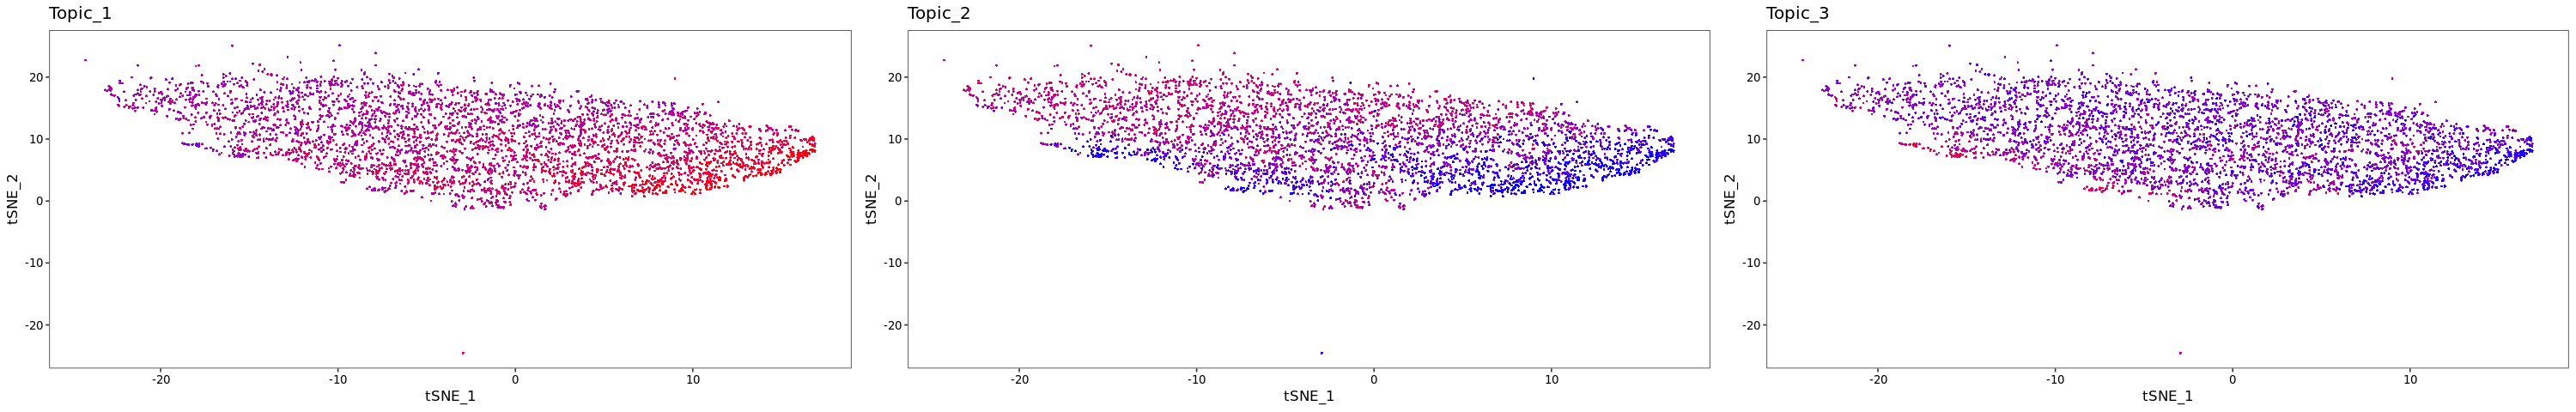

In [45]:
genes=extract_genes()
genes

[1] "T_cells"


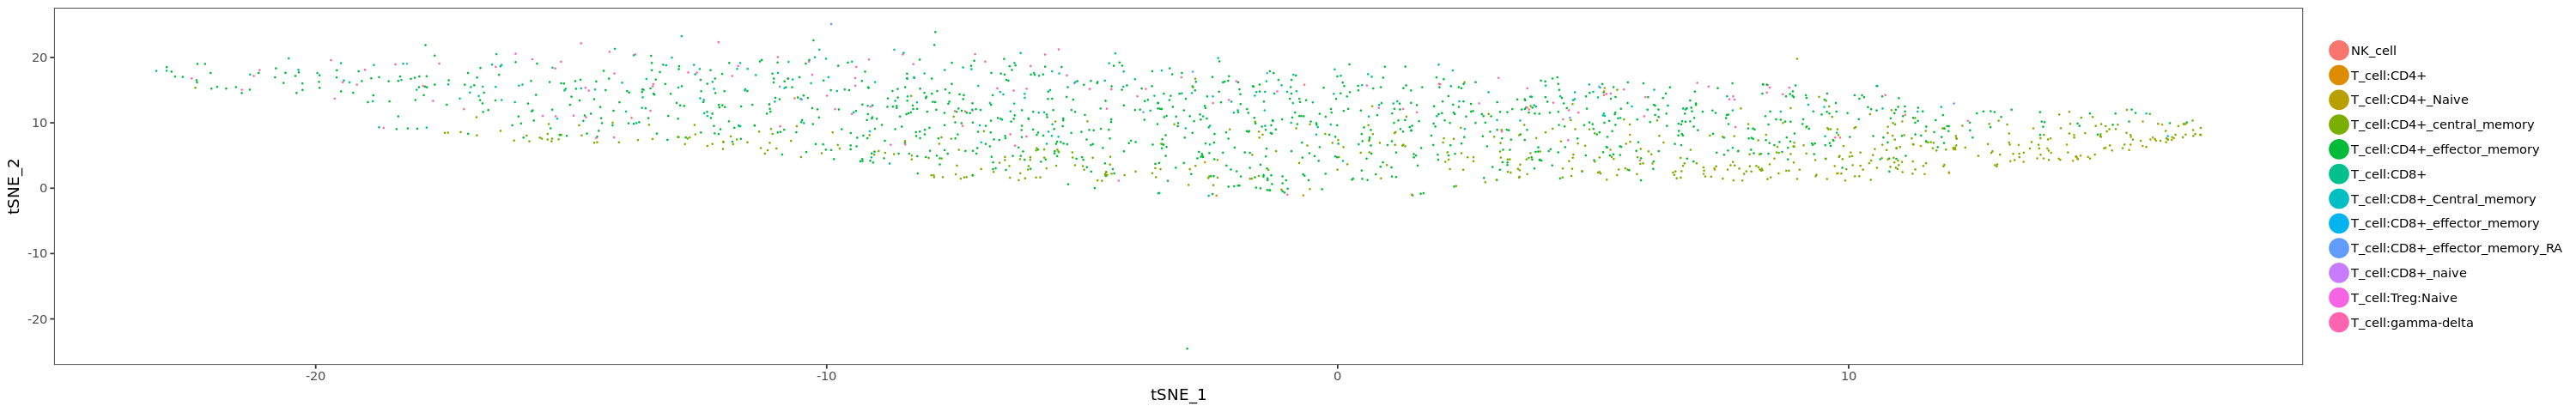

topic
1   1    
2   1    
3   1    
4   1    
5   1    
6   1    
7   2    
8   2    
9   2    
10  2    
... ...  
28  3    
29  3    
30  3    
31  3    
32  3    
33  3    
34  3    
35  3    
36  3    
37  3    
    Term                                                                      
1   oxygen transport (GO:0015671)                                             
2   oxygen transport (GO:0015671)                                             
3   formation of translation preinitiation complex (GO:0001731)               
4   formation of translation preinitiation complex (GO:0001731)               
5   rRNA-containing ribonucleoprotein complex export from nucleus (GO:0071428)
6   rRNA-containing ribonucleoprotein complex export from nucleus (GO:0071428)
7   negative regulation by host of viral transcription (GO:0043922)           
8   negative regulation by host of viral transcription (GO:0043922)           
9   negative regulation by host of viral transcription (GO:0043922)           
10  negative regulation by host of viral transcription (GO:0043922)           
... ...                                                                       
28  phagocytosis, engulfment (GO:0006911)                                     
29  phagocytosis, engulfment (GO:0006911)                                     
30  phagocytosis, engulfment (GO:0006911)                                     
31  phagocytosis, engulfment (GO:0006911)                                     
32  B cell receptor signaling pathway (GO:0050853)                            
33  B cell receptor signaling pathway (GO:0050853)                            
34  B cell receptor signaling pathway (GO:0050853)                            
35  B cell receptor signaling pathway (GO:0050853)                            
36  B cell receptor signaling pathway (GO:0050853)                            
37  B cell receptor signaling pathway (GO:0050853)                            
    Overlap Adjusted.P.value V1    
1   2/8     5.852765e-03     HBB   
2   2/8     5.852765e-03     HBA1  
3   2/8     5.852765e-03     EIF2S3
4   2/8     5.852765e-03     EIF4B 
5   2/8     5.852765e-03     NPM1  
6   2/8     5.852765e-03     RPSA  
7   4/13    4.690076e-06     JUN   
8   4/13    4.690076e-06     CCL5  
9   4/13    4.690076e-06     CCL4  
10  4/13    4.690076e-06     CCL3  
... ...     ...              ...   
28  6/105   1.424983e-05     IGHG2 
29  6/105   1.424983e-05     IGKC  
30  6/105   1.424983e-05     TRBC1 
31  6/105   1.424983e-05     IGLC2 
32  6/105   1.424983e-05     IGHG3 
33  6/105   1.424983e-05     IGHG1 
34  6/105   1.424983e-05     IGHG2 
35  6/105   1.424983e-05     IGKC  
36  6/105   1.424983e-05     TRBC1 
37  6/105   1.424983e-05     IGLC2

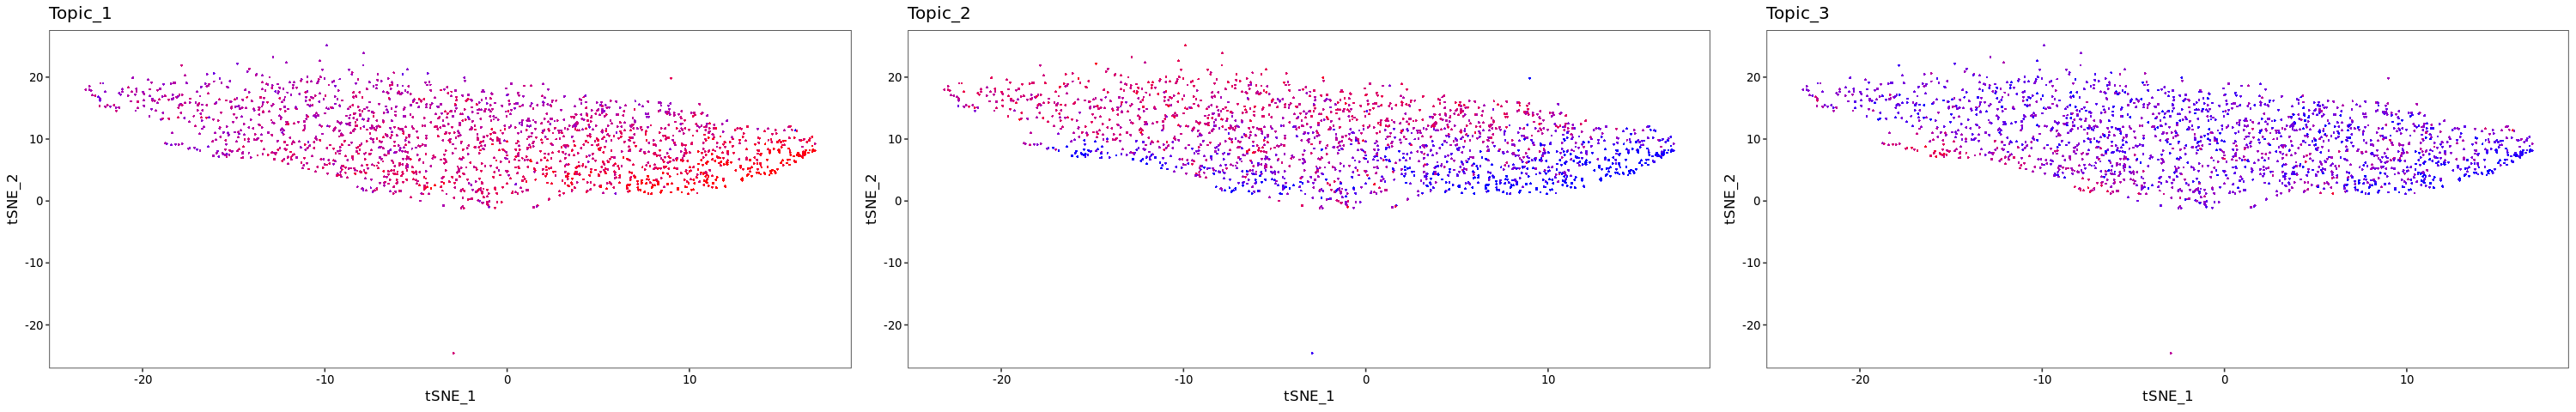

In [43]:
genes=extract_genes()
genes

[1] "malignant"


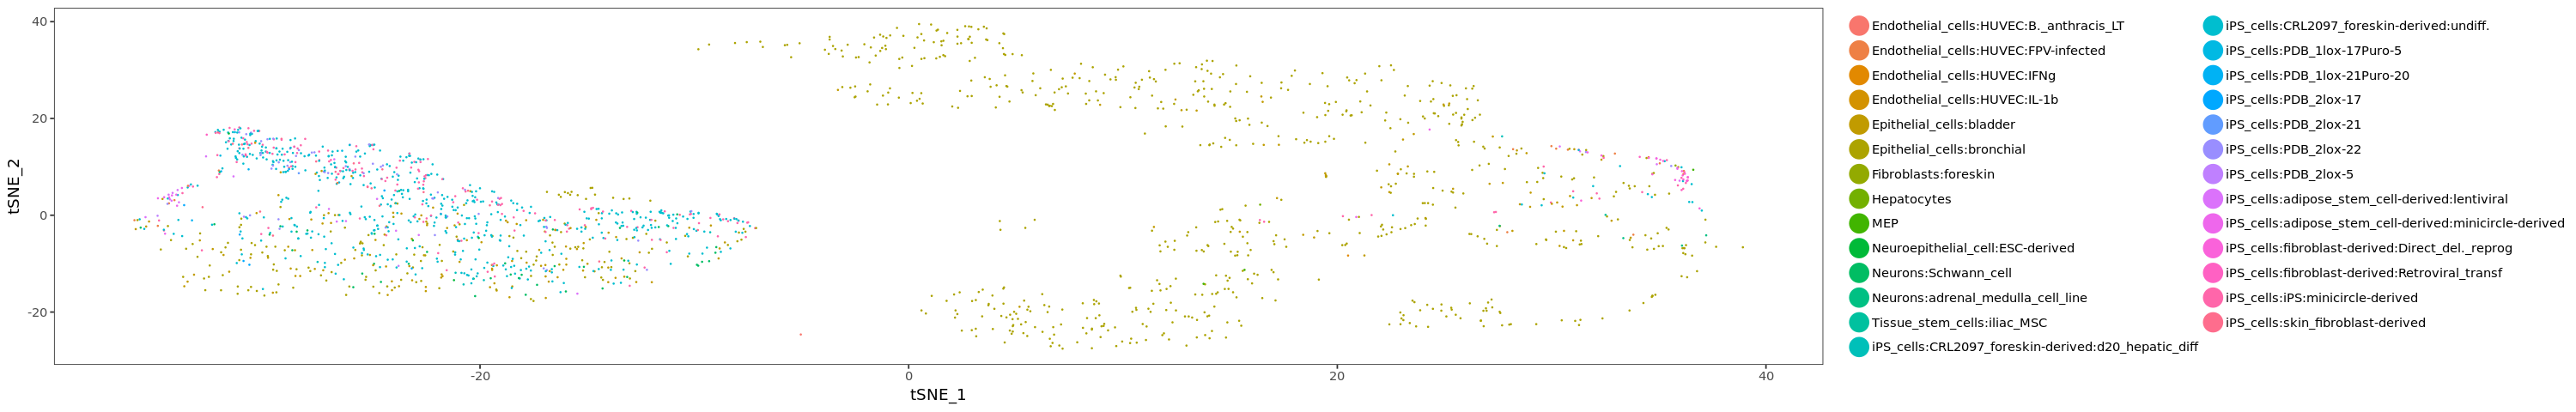

topic
1   1    
2   1    
3   1    
4   1    
5   1    
6   1    
7   2    
8   2    
9   2    
10  2    
... ...  
89  7    
90  7    
91  7    
92  7    
93  7    
94  7    
95  7    
96  7    
97  7    
98  7    
    Term                                                                                                                          
1   regulation of transcription from RNA polymerase II promoter involved in myocardial precursor cell differentiation (GO:0003256)
2   regulation of transcription from RNA polymerase II promoter involved in myocardial precursor cell differentiation (GO:0003256)
3   embryonic skeletal joint morphogenesis (GO:0060272)                                                                           
4   embryonic skeletal joint morphogenesis (GO:0060272)                                                                           
5   mitral valve morphogenesis (GO:0003183)                                                                                       
6   mitral valve morphogenesis (GO:0003183)                                                                                       
7   mitochondrial ATP synthesis coupled proton transport (GO:0042776)                                                             
8   mitochondrial ATP synthesis coupled proton transport (GO:0042776)                                                             
9   mitochondrial ATP synthesis coupled proton transport (GO:0042776)                                                             
10  mitochondrial ATP synthesis coupled proton transport (GO:0042776)                                                             
... ...                                                                                                                           
89  neutrophil mediated immunity (GO:0002446)                                                                                     
90  neutrophil mediated immunity (GO:0002446)                                                                                     
91  neutrophil mediated immunity (GO:0002446)                                                                                     
92  neutrophil mediated immunity (GO:0002446)                                                                                     
93  neutrophil mediated immunity (GO:0002446)                                                                                     
94  neutrophil mediated immunity (GO:0002446)                                                                                     
95  positive regulation of granulocyte chemotaxis (GO:0071624)                                                                    
96  positive regulation of granulocyte chemotaxis (GO:0071624)                                                                    
97  positive regulation of granulocyte chemotaxis (GO:0071624)                                                                    
98  positive regulation of granulocyte chemotaxis (GO:0071624)                                                                    
    Overlap Adjusted.P.value V1    
1   2/8     2.089960e-02     GREM1 
2   2/8     2.089960e-02     NOTCH1
3   2/7     2.089960e-02     OSR1  
4   2/7     2.089960e-02     CTNNB1
5   2/10    2.089960e-02     NOTCH1
6   2/10    2.089960e-02     SOX4  
7   5/22    1.017619e-06     ATP5B 
8   5/22    1.017619e-06     ATP5A1
9   5/22    1.017619e-06     ATP5C1
10  5/22    1.017619e-06     ATP5J 
... ...     ...              ...   
89  10/488  2.551050e-05     LCN2  
90  10/488  2.551050e-05     CXCL1 
91  10/488  2.551050e-05     S100A9
92  10/488  2.551050e-05     S100A8
93  10/488  2.551050e-05     LTF   
94  10/488  2.551050e-05     S100A7
95  4/27    4.210268e-05     CXCL1 
96  4/27    4.210268e-05     CXCL3 
97  4/27    4.210268e-05     CXCL2 
98  4/27    4.210268e-05     S100A7

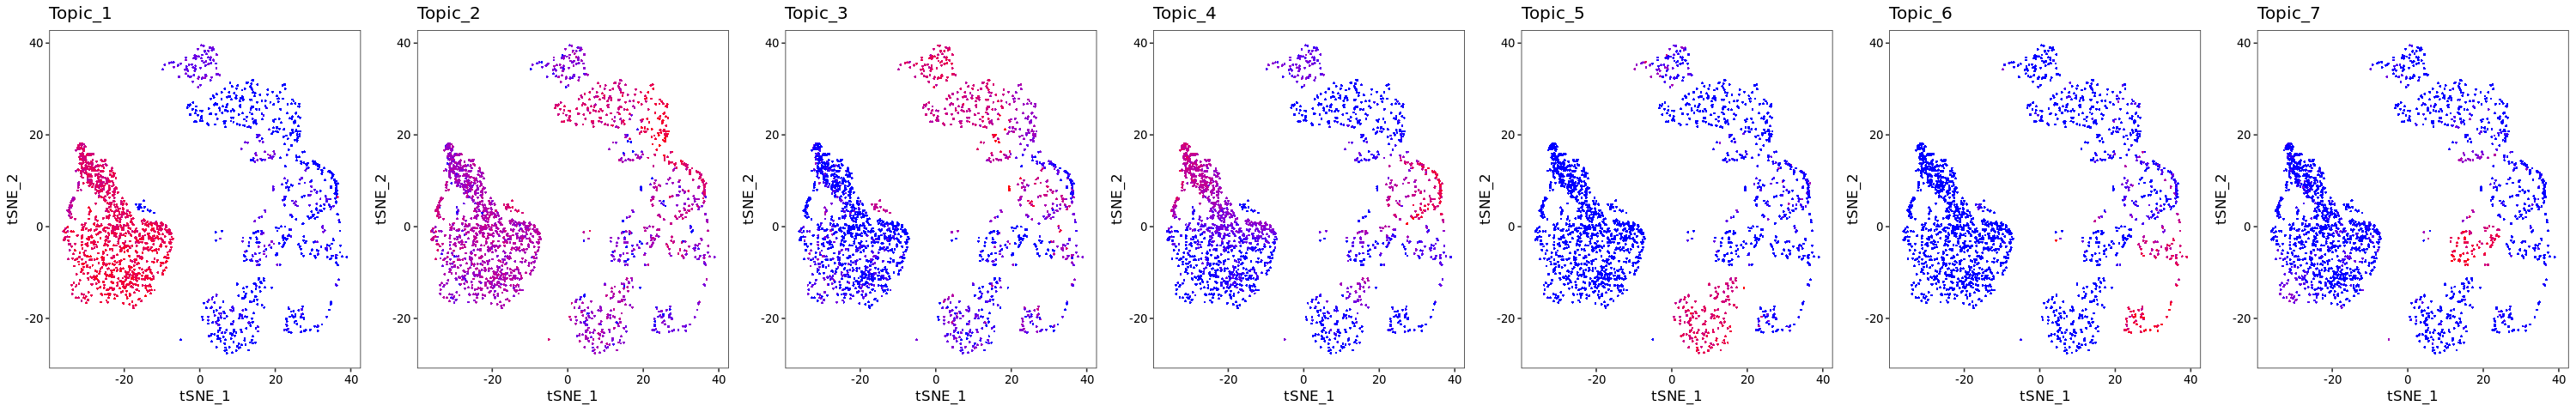

In [17]:
genes=extract_genes()
genes

[1] "MonoMacro"


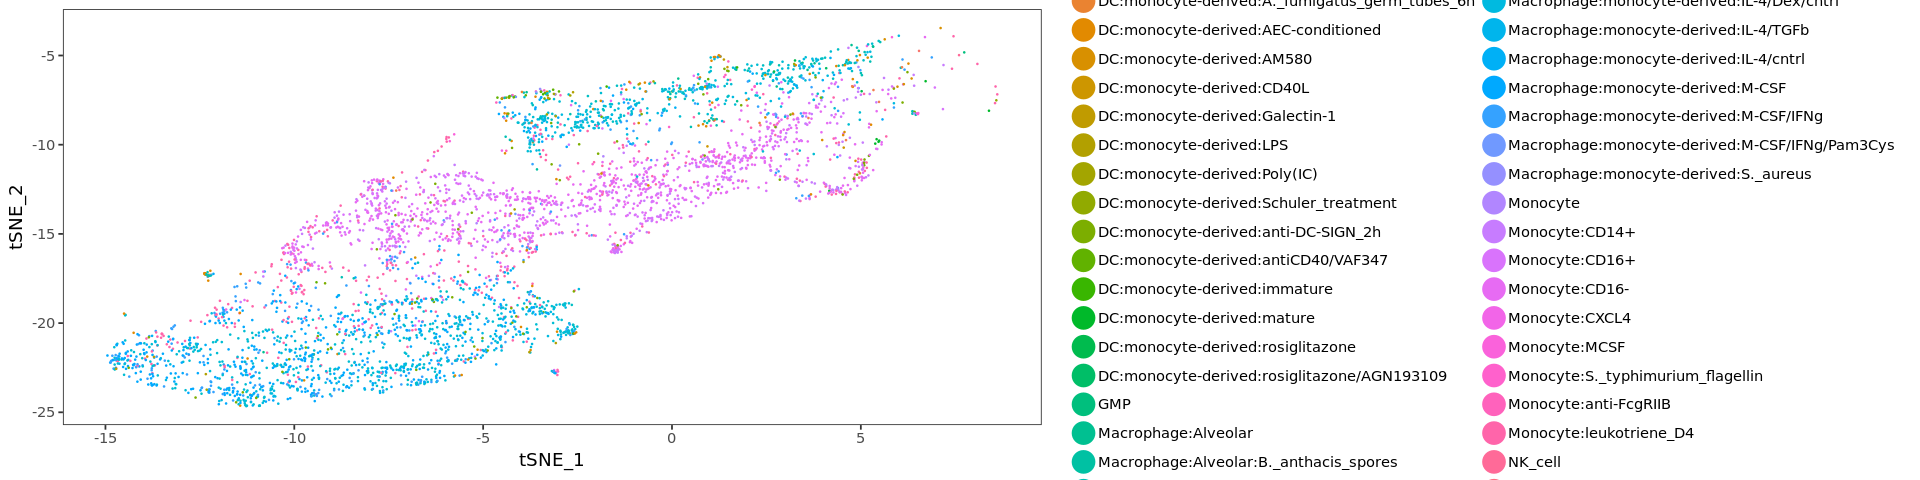

topic
1  1    
2  1    
3  2    
4  2    
5  2    
6  2    
7  2    
8  3    
9  3    
10 4    
   Term                                                                                          
1  cellular iron ion homeostasis (GO:0006879)                                                    
2  cellular iron ion homeostasis (GO:0006879)                                                    
3  antigen processing and presentation of exogenous peptide antigen via MHC class II (GO:0019886)
4  antigen processing and presentation of exogenous peptide antigen via MHC class II (GO:0019886)
5  antigen processing and presentation of exogenous peptide antigen via MHC class II (GO:0019886)
6  antigen processing and presentation of exogenous peptide antigen via MHC class II (GO:0019886)
7  antigen processing and presentation of exogenous peptide antigen via MHC class II (GO:0019886)
8  regulation of sterol transport (GO:0032371)                                                   
9  regulation of sterol transport (GO:0032371)                                                   
10 positive regulation of bone resorption (GO:0045780)                                           
   Overlap Adjusted.P.value V1      
1  2/57    1.135122e-04     FTH1    
2  2/57    1.135122e-04     FTL     
3  5/98    8.229275e-11     CD74    
4  5/98    8.229275e-11     HLA-DPB1
5  5/98    8.229275e-11     HLA-DRA 
6  5/98    8.229275e-11     HLA-DRB1
7  5/98    8.229275e-11     HLA-DPA1
8  2/8     2.189442e-04     APOC1   
9  2/8     2.189442e-04     APOE    
10 1/11    1.474584e-02     SPP1

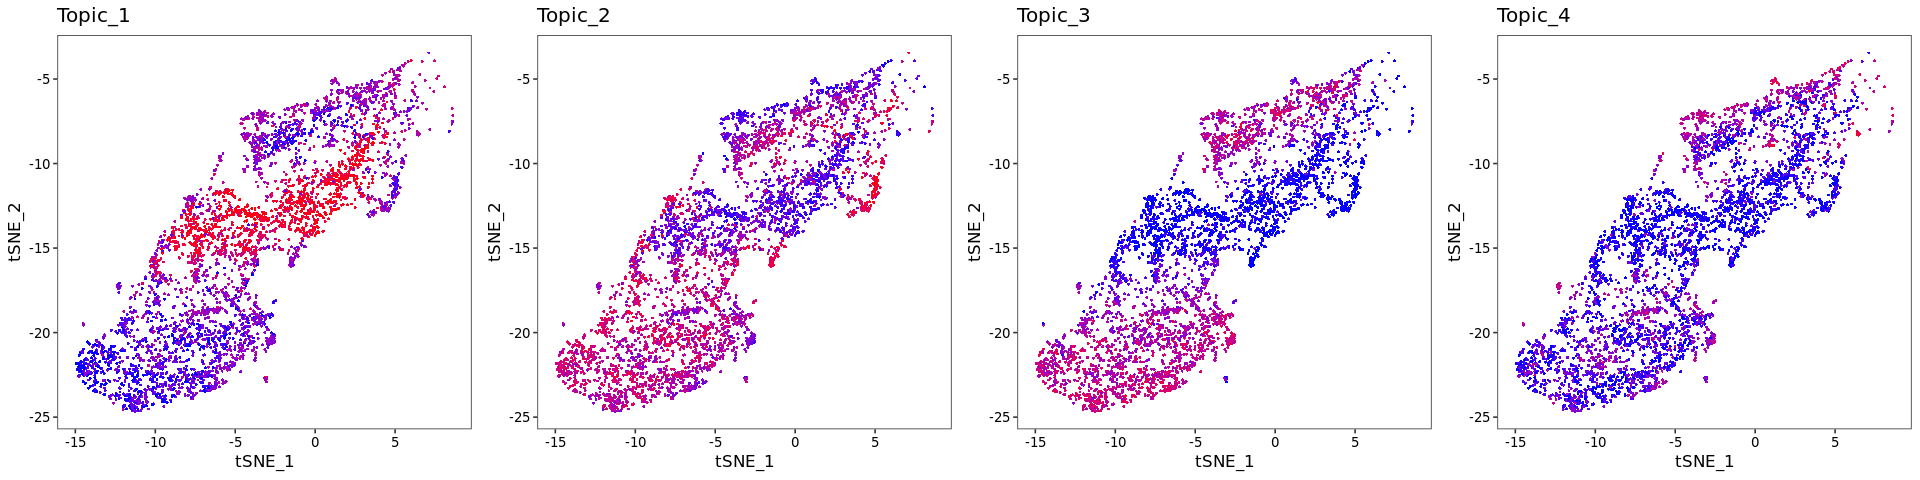

In [83]:
genes=extract_genes()
genes

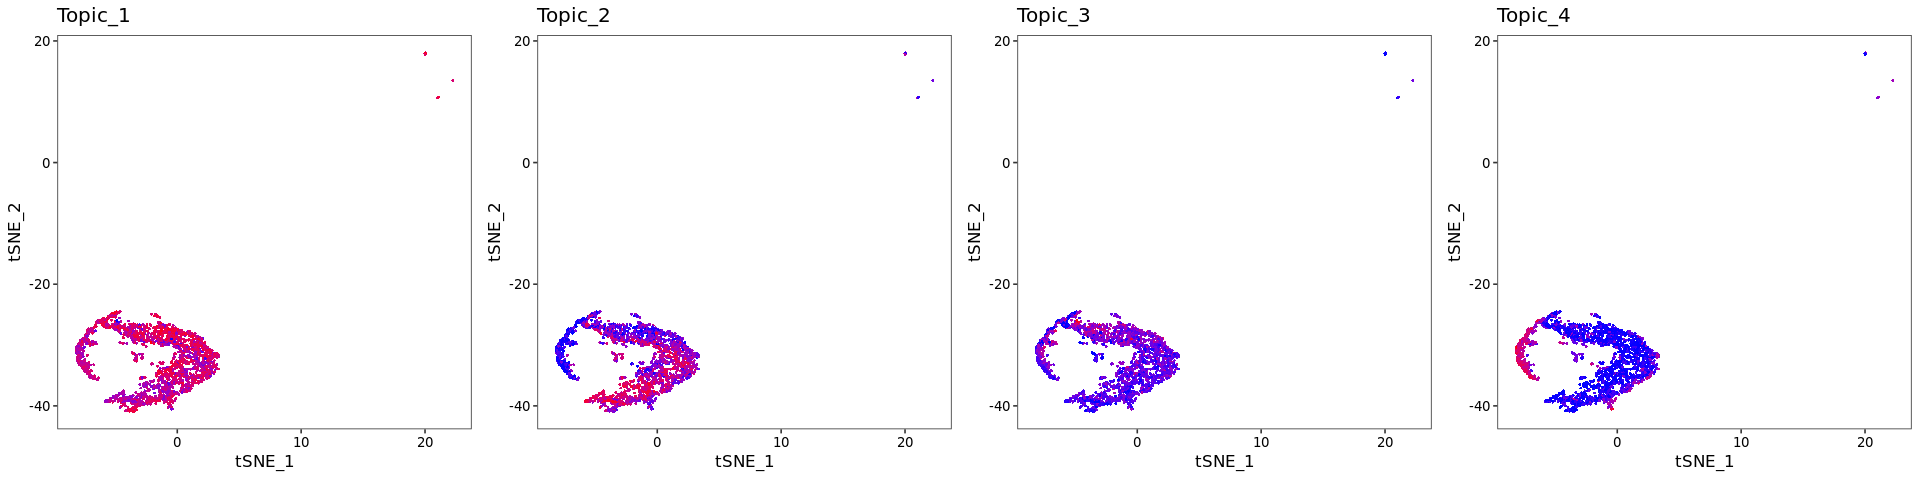

In [132]:
#Endothelial
options(repr.plot.width = 16, repr.plot.height = 4)
FeaturePlot(sub,features.plot = colnames(omega),nCol = 4,cols.use = c("blue","red"),pt.size = 0.5)

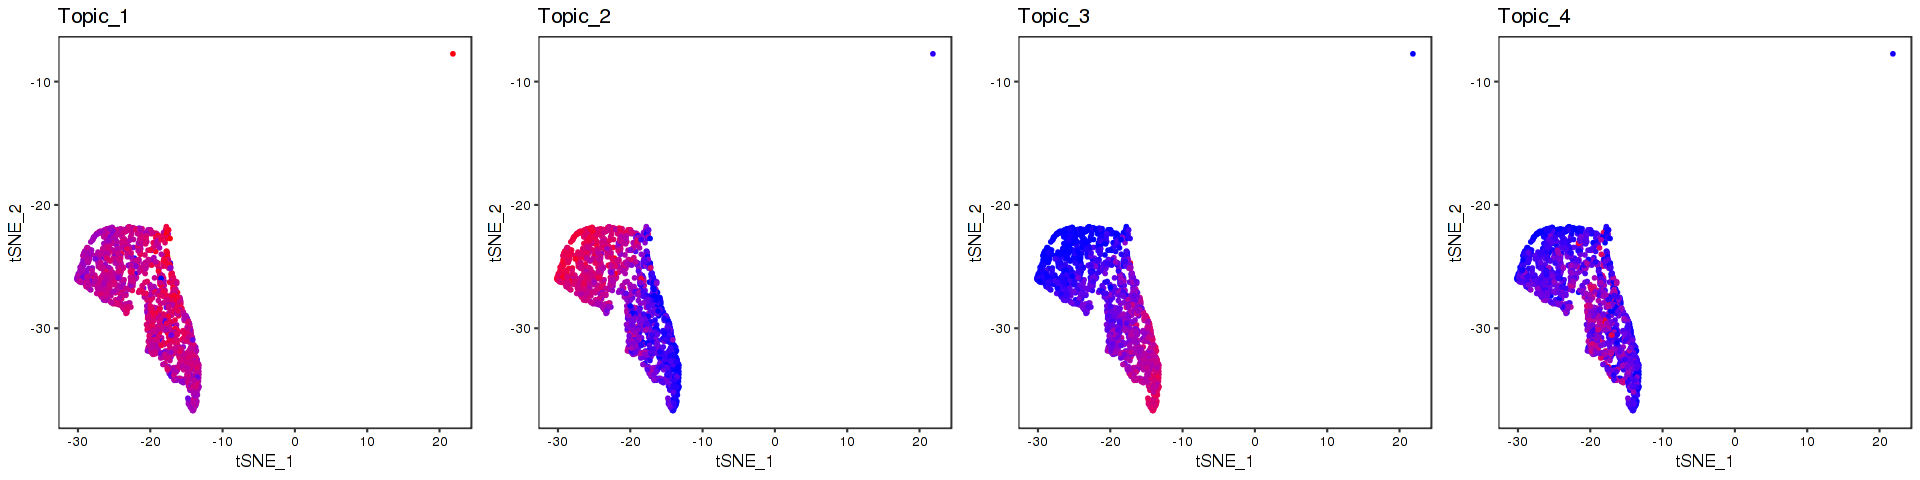

In [23]:
#Fibroblasts
options(repr.plot.width = 16, repr.plot.height = 4)
FeaturePlot(sub,features.plot = colnames(omega),nCol = 4,cols.use = c("blue","red"))

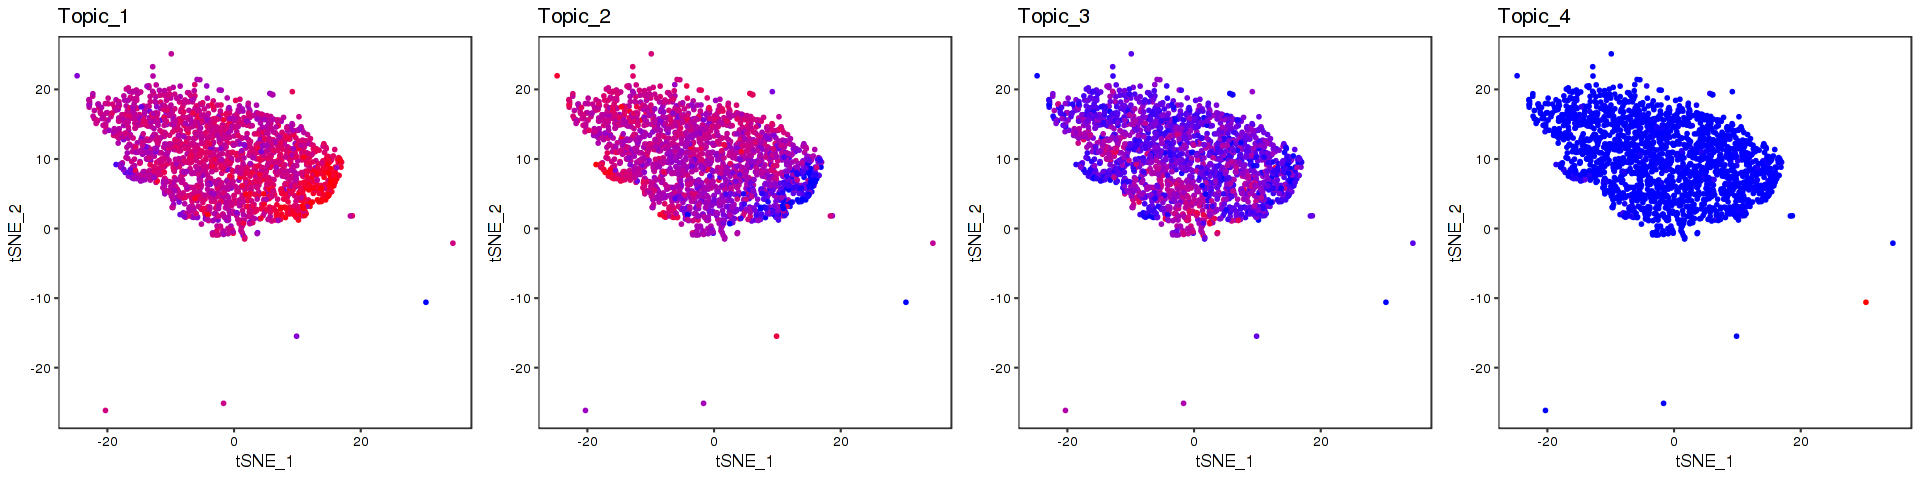

In [86]:
#T_cells #2000
options(repr.plot.width = 16, repr.plot.height = 4)
FeaturePlot(sub,features.plot = colnames(omega),nCol = 4,cols.use = c("blue","red"))

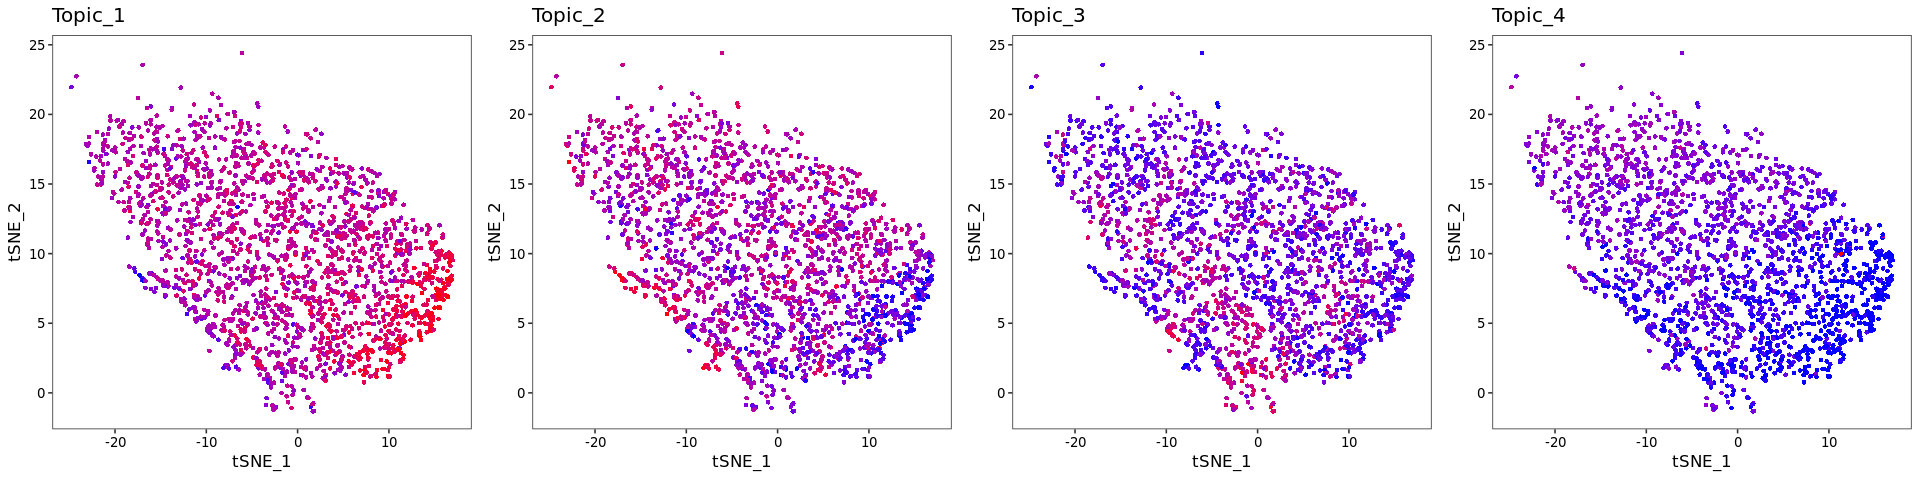

In [73]:
#T_cells #2000
options(repr.plot.width = 16, repr.plot.height = 4)
FeaturePlot(sub,features.plot = colnames(omega),nCol = 4,cols.use = c("blue","red"))

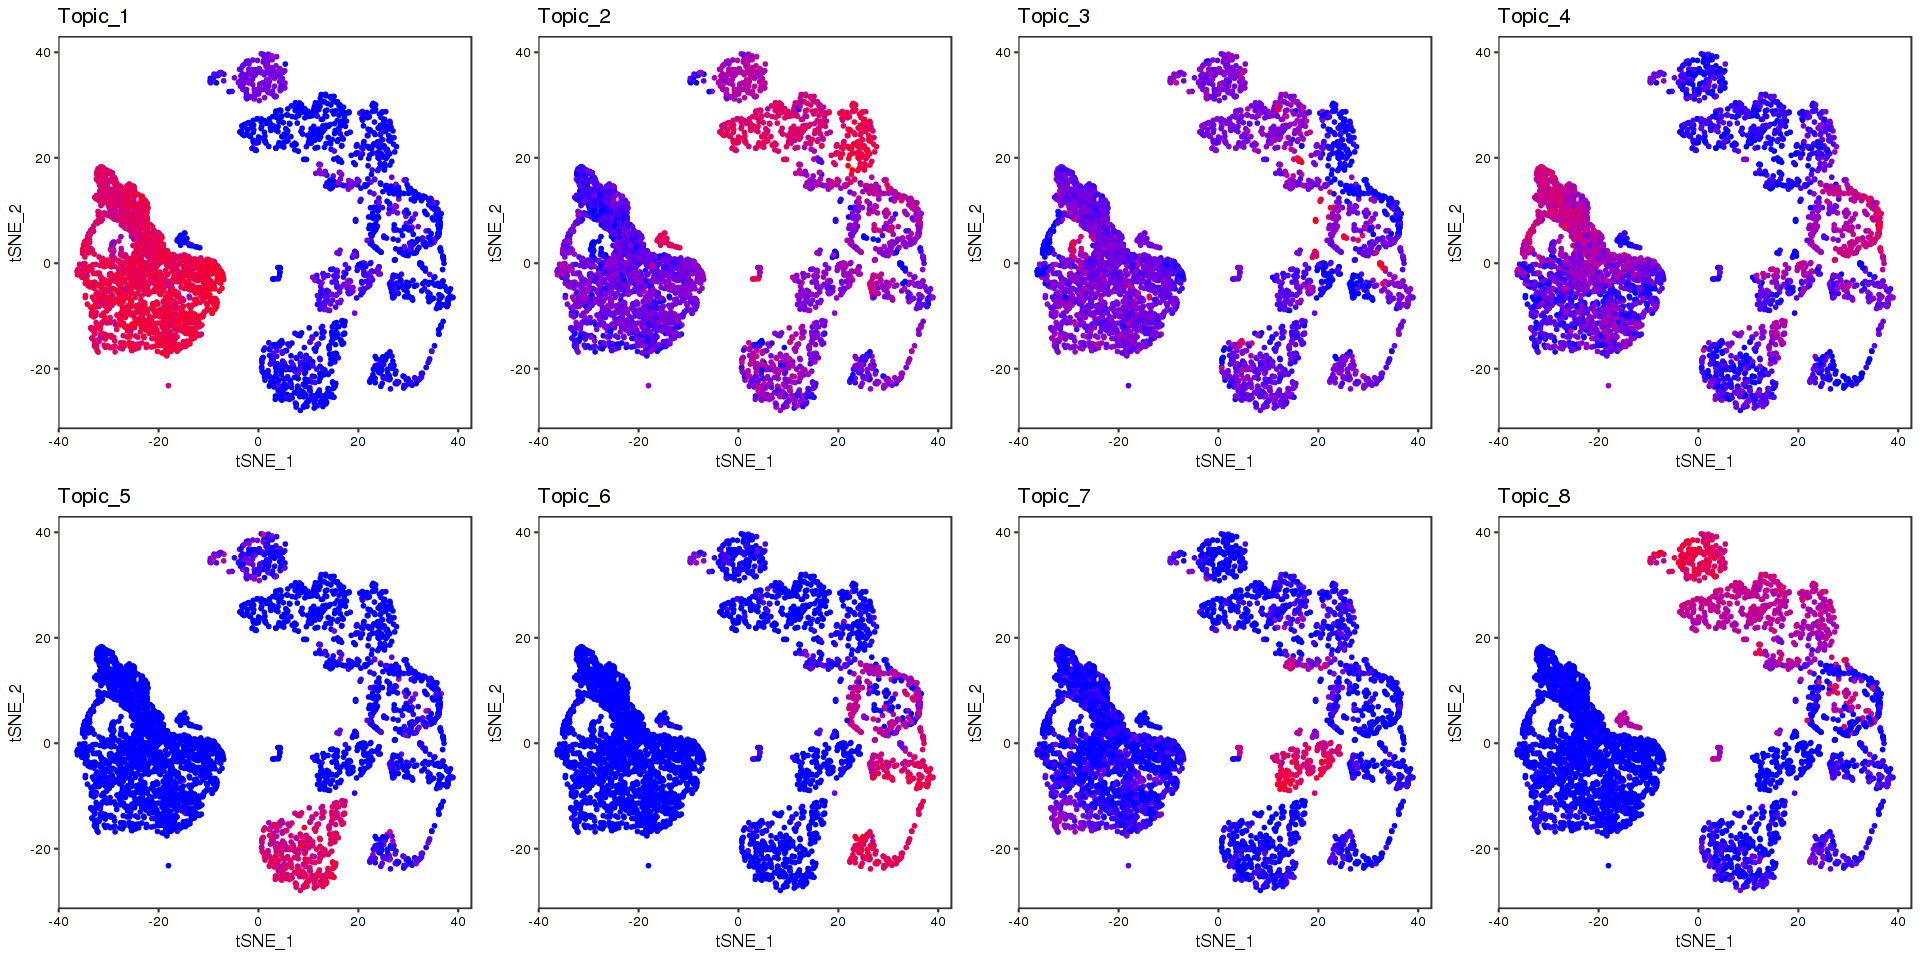

In [22]:
#malignant
options(repr.plot.width = 16, repr.plot.height = 8)
FeaturePlot(sub,features.plot = colnames(omega),nCol = 4,cols.use = c("blue","red"))

#### Follow-up on genes

In [152]:
get_genes=function(gom,top=50){
    theta=gom$fit$theta
    features <- ExtractTopFeatures(theta,method = "bernoulli", top_features=top, options = 'min', shared=TRUE)
    indices_long=melt(as.data.table(t(features$indices)))
    theta_red=as.data.table(theta[indices_long$value,],keep.rownames = "gene")
    theta_red[,topic:=as.numeric(gsub("V","",indices_long$variable)),]
    theta_red[,score:=.SD[,topic,with=FALSE],by=c("gene","topic")]                       
    return(theta_red)                                   
}

In [153]:
tr=get_genes(gom)

Warning message in melt.data.table(as.data.table(t(features$indices))):
"To be consistent with reshape2's melt, id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future."

In [154]:
tr[topic==4]

gene          1            2            3            4           
1   CPB1          3.993325e-13 8.246114e-13 1.933244e-12 0.0012717007
2   TH            4.004373e-13 9.165962e-13 1.882558e-12 0.0003511006
3   TUBA1B        9.044152e-04 6.808906e-04 1.069509e-11 0.0059984386
4   MDK           2.355867e-04 1.233407e-06 5.121467e-04 0.0067070796
5   SLC9A3R1      6.781225e-05 2.018568e-04 1.672871e-04 0.0023603580
6   LINC00052     3.983414e-13 8.254805e-13 1.817537e-12 0.0001447782
7   KRT8          7.134569e-04 1.636503e-03 3.827143e-04 0.0054712471
8   HMGN2         9.405788e-04 5.373414e-04 2.424520e-05 0.0035105720
9   H2AFZ         1.623453e-03 3.692340e-04 7.577720e-09 0.0045116813
10  HSPB1         5.888073e-12 1.731818e-03 1.261264e-03 0.0056024719
... ...           ...          ...          ...          ...         
41  ZWINT         6.829485e-05 1.208867e-05 1.438863e-11 0.0004510519
42  CENPU         1.045079e-05 1.182319e-06 1.455369e-11 0.0002815563
43  RNF114        1.319752e-04 3.855448e-05 6.941476e-06 0.0006536368
44  SCGB1D2       4.095235e-13 9.307949e-13 2.156062e-12 0.0004727810
45  PFDN4         1.896562e-04 8.457142e-05 5.619866e-10 0.0007234709
46  HSP90AA1      8.576073e-04 2.827258e-03 2.661820e-04 0.0045276570
47  TMA7          1.228539e-03 1.181720e-03 3.704895e-04 0.0023629392
48  RP11-206M11.7 4.303188e-13 1.205298e-06 3.659287e-12 0.0001588126
49  CDKN3         5.518467e-05 8.019960e-06 1.123100e-11 0.0003735451
50  NDUFC2        2.922846e-04 6.421476e-04 9.629507e-04 0.0019520467
    5            6            7            topic score       
1   3.819849e-12 2.743353e-12 4.705222e-02 4     0.0012717007
2   3.334523e-12 2.463881e-12 3.412838e-12 4     0.0003511006
3   5.207816e-04 1.214782e-03 6.159440e-05 4     0.0059984386
4   1.625511e-03 1.057014e-03 1.777989e-06 4     0.0067070796
5   1.400239e-04 3.295519e-05 9.014428e-05 4     0.0023603580
6   3.328815e-12 2.470133e-12 3.490179e-12 4     0.0001447782
7   2.278389e-05 1.875416e-03 4.532863e-04 4     0.0054712471
8   9.346999e-04 5.744350e-04 7.199779e-04 4     0.0035105720
9   4.172990e-04 7.708675e-04 4.033299e-04 4     0.0045116813
10  1.155154e-11 2.316268e-03 8.877904e-04 4     0.0056024719
... ...          ...          ...          ...   ...         
41  6.834290e-05 5.643469e-05 6.705499e-06 4     0.0004510519
42  2.128666e-05 1.540900e-05 5.819904e-11 4     0.0002815563
43  7.921974e-05 1.565206e-04 2.982319e-05 4     0.0006536368
44  2.408919e-02 2.466362e-12 1.431378e-03 4     0.0004727810
45  6.451966e-12 1.604613e-04 8.342024e-05 4     0.0007234709
46  1.123455e-10 2.002051e-03 5.395662e-04 4     0.0045276570
47  4.097950e-04 2.851155e-04 1.049914e-03 4     0.0023629392
48  4.569833e-06 3.195933e-12 3.554732e-12 4     0.0001588126
49  2.849389e-06 1.395802e-05 1.171898e-11 4     0.0003735451
50  3.515672e-04 4.808397e-04 3.275686e-04 4     0.0019520467

In [28]:
write.table(gene_list,paste0(tag,"_top50.tsv"),sep="\t",quote=F)

In [156]:
cat(as.character(gene_list["Topic_4",]))

ERROR: Error in gene_list["Topic_4", ]: no 'dimnames' attribute for array


#### plot heatmap

In [36]:
gene_list=read.table("T_cells_top50.tsv")

In [ ]:
options(repr.plot.width = 13, repr.plot.height = 3)
DoHeatmap(sub,group.cex = 6,group.order = cell_types,slim.col.label = TRUE,group.label.rot = TRUE,use.scaled = FALSE,
          draw.line = TRUE,genes.use = unlist(gene_list["Topic_2",])[1:20],group.by = "labels",cex.row = 5.5,cex.col = 0)